# TMDB Movie Box Office Revenue Prediction - EDA & Baseline Model Building

I'll analyze the TMDB movie dataset and build modles (Random Forest, Linear Regression)for baseline. The data contains the following fields:

- 'id', 'imdb_id': ID variable
- 'budget', 'popularity', 'runtime', 'revenue': Numerical Variables
- belongs_to_collection', 'genres', 'homepage','original_language', 'original_title', 'spoken_languages', 'status':     Binary variable, Dummy variable (always 1)
- 'overview', 'tagline', 'title', 'Keywords': String value, Textual variable
- 'production_companies','production_countries', 'cast', 'crew': Dictionary variables
- 'release_date': Datetime variable, MM/DD/YYYY

Let's start with some data analysis and visualisation imports, also some basic model buildings. 

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv("data/test.csv")
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [4]:
test.shape

(4398, 22)

In [5]:
train = pd.read_csv("data/train.csv")
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
train.shape

(3000, 23)

In [7]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000
#test
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


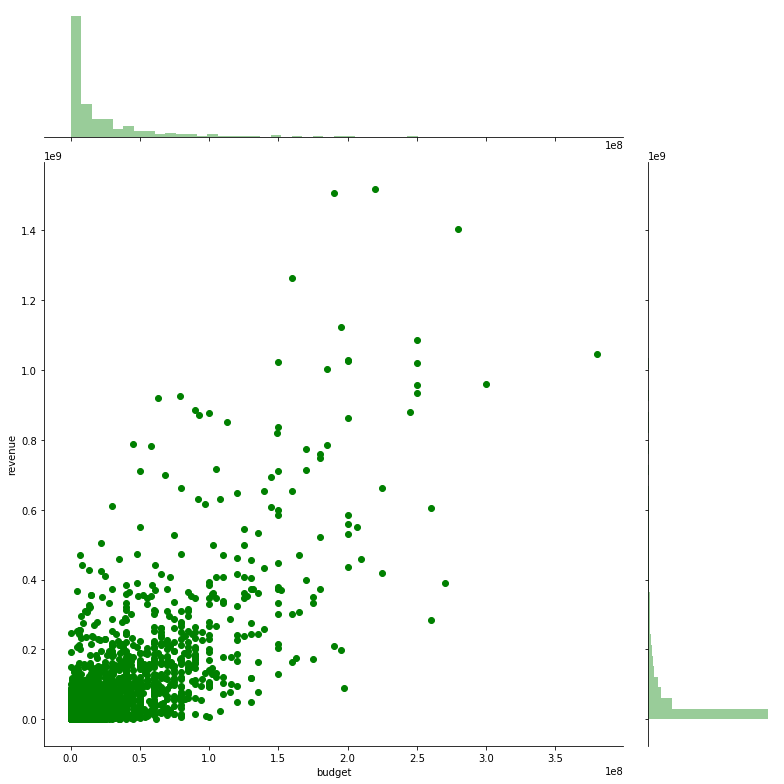

In [8]:
sns.jointplot(x="budget", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

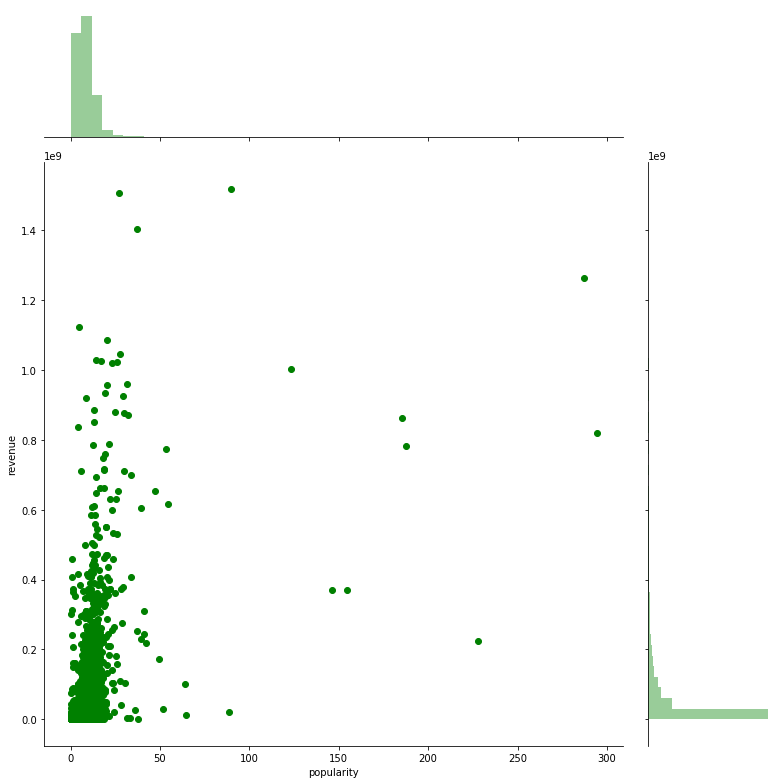

In [9]:
sns.jointplot(x="popularity", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

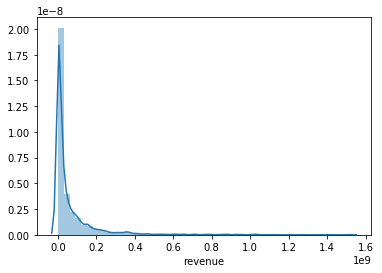

In [10]:
sns.distplot(train.revenue)

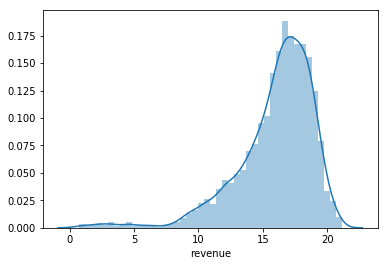

In [11]:
sns.distplot(np.log1p(train['revenue']))

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5, 1.0, 'Revenue of movies with and without homepage')

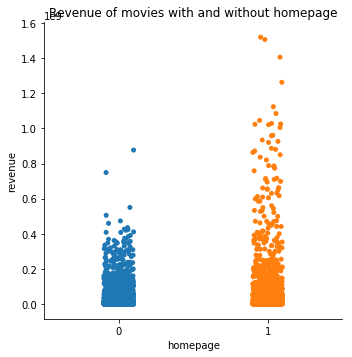

In [1185]:
train_hp = train
train_hp['homepage'].loc[~train_hp['homepage'].isnull()] = 1 
train_hp["homepage"] = train_hp['homepage'].fillna(0)

sns.catplot(x="homepage", y="revenue", data=train_hp)
plt.title('Revenue of movies with and without homepage')

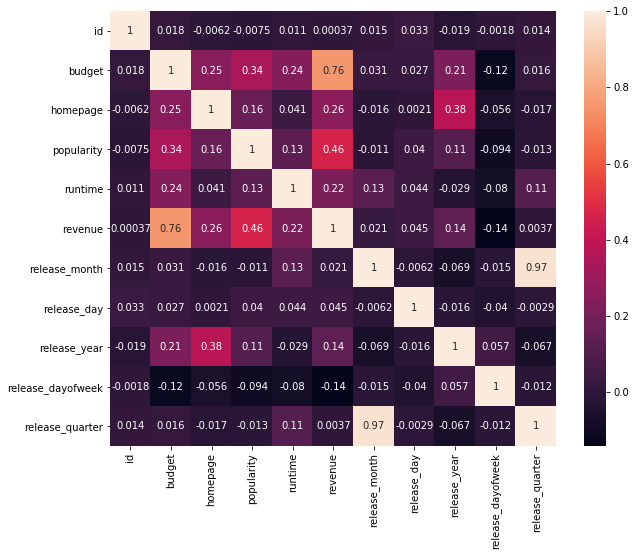

In [1186]:
train_hp[['release_month','release_day','release_year']]= train_hp['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
    
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train_hp.loc[ (train_hp['release_year'] <= 18) & (train_hp['release_year'] < 100), "release_year"] += 2000
train_hp.loc[ (train_hp['release_year'] > 18)  & (train_hp['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train_hp['release_date']) 
train_hp['release_dayofweek'] = releaseDate.dt.dayofweek
train_hp['release_quarter'] = releaseDate.dt.quarter

train_cor = train_hp[['budget','popularity','runtime','release_year','release_month','release_dayofweek','revenue']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [ ]:
#all_data = all_data.drop('revenue', axis=1)

### Additional data

In [12]:
add_train_data = pd.read_csv('data/additional data/TrainAdditionalFeatures.csv')
add_train_data.head()

,imdb_id,popularity2,rating,totalVotes
0,tt0169547,16.217,8.0,6016.0
1,tt0119116,26.326,7.4,5862.0
2,tt0325980,28.244,7.7,11546.0
3,tt0266697,18.202,7.9,8638.0
4,tt0418763,9.653,6.6,1201.0


In [13]:
add_train_data.shape

(2887, 4)

In [14]:
add_test_data = pd.read_csv('data/additional data/TestAdditionalFeatures.csv')
add_test_data.head()

,imdb_id,popularity2,rating,totalVotes
0,tt0113101,11.182,6.3,1078.0
1,tt0107286,8.038,6.5,111.0
2,tt0076759,36.016,8.2,10729.0
3,tt0266543,18.503,7.8,10766.0
4,tt0033467,15.322,8.1,2203.0


In [15]:
add_test_data.shape

(4232, 4)

Merge to train and test

In [16]:
train_2 = pd.merge(train, add_train_data, how='left', on=['imdb_id'])
train_2.shape

(3000, 26)

In [17]:
train_2.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,5.531,7.5,115.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,NaN,NaN


In [18]:
test_2 = pd.merge(test, add_test_data, how='left', on=['imdb_id'])
test_2.shape

(4398, 25)

In [19]:
test_2.columns.values

array(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'popularity2', 'rating', 'totalVotes'],
      dtype=object)

In [20]:
test_2 = test_2.drop('popularity2', axis=1)
test_2.shape

(4398, 24)

In [21]:
test_2.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,rating,totalVotes
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.6,91.0
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",4.5,51.0
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",6.1,176.0
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",8.0,937.0
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",6.8,50.0


In [22]:
train_norevenue = train_2.drop('revenue', axis = 1)

In [957]:
#train_norevenue = train_norevenue.drop('revenue', axis = 1)

In [23]:
train_norevenue.columns.values

array(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'popularity2', 'rating', 'totalVotes'],
      dtype=object)

In [24]:
train_norevenue.shape

(3000, 25)

In [25]:
#combine test and train
all_data = pd.concat([train_norevenue, test_2], axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [26]:
all_data.columns.values

array(['Keywords', 'belongs_to_collection', 'budget', 'cast', 'crew',
       'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'popularity2',
       'poster_path', 'production_companies', 'production_countries',
       'rating', 'release_date', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'totalVotes'], dtype=object)

In [27]:
all_data.head()

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,...,production_companies,production_countries,rating,release_date,runtime,spoken_languages,status,tagline,title,totalVotes
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...","[{'id': 35, 'name': 'Comedy'}]",NaN,1,tt2637294,en,...,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.0,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,482.0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,2,tt0368933,en,...,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6.4,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,1528.0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",NaN,3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,3,tt2582802,en,...,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8.4,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,7314.0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",NaN,1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,4,tt1821480,hi,...,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",7.5,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,115.0
4,NaN,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,5,tt1380152,ko,...,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",NaN,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN


### EDA (Test data)

In [28]:
all_data.isnull().sum()

Keywords                  669
belongs_to_collection    5917
budget                      0
cast                       26
crew                       38
genres                     23
homepage                 5032
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
popularity2              4516
poster_path                 2
production_companies      414
production_countries      157
rating                    297
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
totalVotes                297
dtype: int64

In [29]:
all_data['rating'] = all_data['rating'].fillna(all_data['rating'].mean())

In [30]:
all_data['totalVotes'] = all_data['totalVotes'].fillna(all_data['totalVotes'].mean())

### belongs_to_collection

In [31]:
#process varible "belongs_to_collection", movie within a collection will be 1, without will be 0.

def process_belongs_to_collection(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna(0)
    
    else: 
        variable = variable
        
    variable_l = variable.tolist()
        
    variable_nm = list(map(lambda x: str(x).split(', ')[1].partition("'name': '")[2].replace("'", '') 
                         if x != 0 else 0, variable_l))
        
    all_data['collection_nm'] = variable_nm
    
    all_data['collection_nm'].loc[all_data['collection_nm'] != 0] = 1
    
    print (all_data['collection_nm'].head())
    

In [32]:
if __name__ == "__main__": 
    
    process_belongs_to_collection(all_data['belongs_to_collection'])

0    1
1    1
2    0
3    0
4    0
Name: collection_nm, dtype: int64


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
all_data_1 = all_data.drop('belongs_to_collection', axis=1)
all_data_1.shape

(7398, 25)

### genres

In [34]:
#for each movie, convert genres to dummy variables, geners for each move => 1

def process_genres(variable):

    try:
        d = eval(variable)
    except:
        d = {}
    return d

if __name__ == "__main__": 

    all_data_1 = all_data_1
    all_data_1['genres'] = all_data_1['genres'].map(lambda x: 
                                sorted([d['name'] for d in process_genres(x)])).map(lambda x: ','.join(map(str, x)))
    genres = all_data_1.genres.str.get_dummies(sep=',')
    all_data_1 = pd.concat([all_data_1, genres], axis=1, sort=False)
    print("Action Genres Movie           ", all_data_1[all_data_1.Action == 1].shape[0])
    print("Adventure Genres Movie        ", all_data_1[all_data_1.Adventure == 1].shape[0])
    print("Animation Genres Movie        ", all_data_1[all_data_1.Animation == 1].shape[0])
    print("Comedy Genres Movie           ", all_data_1[all_data_1.Comedy == 1].shape[0])
    print("Crime Genres Movie            ", all_data_1[all_data_1.Crime == 1].shape[0])
    print("Documentary Genres Movie      ", all_data_1[all_data_1.Documentary == 1].shape[0])
    print("Drama Genres Movie            ", all_data_1[all_data_1.Drama == 1].shape[0])
    print("Family Genres Movie           ", all_data_1[all_data_1.Family == 1].shape[0])
    print("Fantasy Genres Movie          ", all_data_1[all_data_1.Fantasy == 1].shape[0])
    print("Foreign Genres Movie          ", all_data_1[all_data_1.Foreign == 1].shape[0])
    print("History Genres Movie          ", all_data_1[all_data_1.History == 1].shape[0])
    print("Music Genres Movie            ", all_data_1[all_data_1.Music == 1].shape[0])
    print("Mystery Genres Movie          ", all_data_1[all_data_1.Mystery == 1].shape[0])
    print("Romance Genres Movie          ", all_data_1[all_data_1.Romance == 1].shape[0])
    print("Science Fiction Genres Movie  ", all_data_1[all_data_1['Science Fiction'] == 1].shape[0])
    print("TV Movie Genres Movie         ", all_data_1[all_data_1['TV Movie'] == 1].shape[0])
    print("Thriller Genres Movie         ", all_data_1[all_data_1.Thriller == 1].shape[0])
    print("War Genres Movie              ", all_data_1[all_data_1.War == 1].shape[0])
    print("Western Genres Movie          ", all_data_1[all_data_1.Western == 1].shape[0])

Action Genres Movie            1735
Adventure Genres Movie         1116
Animation Genres Movie         382
Comedy Genres Movie            2605
Crime Genres Movie             1084
Documentary Genres Movie       221
Drama Genres Movie             3676
Family Genres Movie            675
Fantasy Genres Movie           628
Foreign Genres Movie           84
History Genres Movie           295
Music Genres Movie             267
Mystery Genres Movie           550
Romance Genres Movie           1435
Science Fiction Genres Movie   744
TV Movie Genres Movie          1
Thriller Genres Movie          1869
War Genres Movie               243
Western Genres Movie           117


In [35]:
all_data_1 = all_data_1.drop('genres', axis=1)
all_data_1.shape

(7398, 44)

In [36]:
all_data_1.head()

,Keywords,budget,cast,crew,homepage,id,imdb_id,original_language,original_title,overview,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN,1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,0,0,0,0,0,0,0,0,0,0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",NaN,2,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,...,0,0,0,0,1,0,0,0,0,0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",http://sonyclassics.com/whiplash/,3,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,0,0,0,0,0,0,0,0,0,0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",http://kahaanithefilm.com/,4,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,...,0,0,0,0,0,0,0,1,0,0
4,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",NaN,5,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,0,0,0,0,0,0,0,1,0,0


### homepage

In [37]:
#convert homepage to 0 or 1, 0 means the movie doesn't have a homepage, otherwise 1.

def process_homepage(variable):
    
    variable.loc[~variable.isnull()] = 1
    
    all_data_1["homepage"] = variable.fillna(0)
    
    print (all_data_1["homepage"].head())

In [38]:
if __name__ == "__main__": 
    
    process_homepage(all_data_1['homepage'])

0    0
1    0
2    1
3    1
4    0
Name: homepage, dtype: int64


### release date

In [39]:
#convert release date mm/dd/yy to three variables for month, date, and year

def process_release_date(variable):
    
    all_data_1[['release_month','release_day','release_year']]= variable.str.split('/',expand=True).replace(np.nan, -1).astype(int)
    
    # Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
    all_data_1.loc[ (all_data_1['release_year'] <= 18) & (all_data_1['release_year'] < 100), "release_year"] += 2000
    all_data_1.loc[ (all_data_1['release_year'] > 18)  & (all_data_1['release_year'] < 100), "release_year"] += 1900
    
    releaseDate = pd.to_datetime(variable) 
    all_data_1['release_dayofweek'] = releaseDate.dt.dayofweek
    all_data_1['release_quarter'] = releaseDate.dt.quarter
    
    print(all_data_1[['release_month','release_day','release_year', 'release_dayofweek', 'release_quarter']].head())

In [40]:
if __name__ == "__main__": 
    
    process_release_date(all_data_1['release_date'])

   release_month  release_day  release_year  release_dayofweek  \
0              2           20          2015                4.0   
1              8            6          2004                4.0   
2             10           10          2014                4.0   
3              3            9          2012                4.0   
4              2            5          2009                3.0   

   release_quarter  
0              1.0  
1              3.0  
2              4.0  
3              1.0  
4              1.0  


In [41]:
all_data_1 = all_data_1.drop('release_date', axis=1)

In [42]:
all_data_1.shape

(7398, 48)

In [43]:
all_data_1['release_dayofweek'] = all_data_1['release_dayofweek'].fillna(0.0)

In [44]:
all_data_1['release_quarter'] = all_data_1['release_quarter'].fillna(0.0)

### budget

In [45]:
#convert budget to log, and generate variables including: budget_runtime_ratio, 
#budget_popularity_ratio, budget_year_ratio, meanBudgetByYear

def process_budget(variable):
    
    all_data_1['budget_log'] = np.log1p(variable)
    
    ### budget runtime ratio
    all_data_1["budget_runtime_ratio"] = all_data_1['budget_log']/all_data_1['runtime'] 
    
    ### budget popularity ratio
    all_data_1['budget_popularity_ratio'] = all_data_1['budget_log']/all_data_1['popularity']
    
    ### budget year ratio
    all_data_1['budget_year_ratio'] = all_data_1['budget_log']/(all_data_1['release_year']*all_data_1['release_year'])

    print(all_data_1[['budget_log',"budget_runtime_ratio", 
                  'budget_popularity_ratio', 
                 'budget_year_ratio']].head())


In [46]:
if __name__ == "__main__": 
    
    process_budget(all_data_1['budget'])

   budget_log  budget_runtime_ratio  budget_popularity_ratio  \
0   16.454568              0.176931                 2.502446   
1   17.504390              0.154906                 2.122028   
2   15.009433              0.142947                 0.233428   
3   13.997833              0.114736                 4.408855   
4    0.000000              0.000000                 0.000000   

   budget_year_ratio  
0           0.000004  
1           0.000004  
2           0.000004  
3           0.000003  
4           0.000000  


In [47]:
 ### mean budget by year
meanBudgetByYear = all_data_1.groupby('release_year')['budget_log'].aggregate('mean')

In [48]:
meanBudgetByYear.head()

release_year
1921    12.429220
1922    13.910822
1923     5.707110
1924    13.942720
1925     9.874763
Name: budget_log, dtype: float64

In [49]:
all_data_1 = pd.merge(all_data_1, pd.DataFrame(meanBudgetByYear), on = 'release_year', how='left')
all_data_1.head()

,Keywords,budget,cast,crew,homepage,id,imdb_id,original_language,original_title,overview,...,release_month,release_day,release_year,release_dayofweek,release_quarter,budget_log_x,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,budget_log_y
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,2,20,2015,4.0,1.0,16.454568,0.176931,2.502446,0.000004,11.191350
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,...,8,6,2004,4.0,3.0,17.504390,0.154906,2.122028,0.000004,13.762006
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,10,10,2014,4.0,4.0,15.009433,0.142947,0.233428,0.000004,10.959215
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,...,3,9,2012,4.0,1.0,13.997833,0.114736,4.408855,0.000003,11.181553
4,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,2,5,2009,3.0,1.0,0.000000,0.000000,0.000000,0.000000,12.768596


In [50]:
all_data_1 = all_data_1.rename(columns = {'budget_log_y': 'meanBudgetByYear'})
all_data_1.head()

,Keywords,budget,cast,crew,homepage,id,imdb_id,original_language,original_title,overview,...,release_month,release_day,release_year,release_dayofweek,release_quarter,budget_log_x,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,meanBudgetByYear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,2,20,2015,4.0,1.0,16.454568,0.176931,2.502446,0.000004,11.191350
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,...,8,6,2004,4.0,3.0,17.504390,0.154906,2.122028,0.000004,13.762006
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,10,10,2014,4.0,4.0,15.009433,0.142947,0.233428,0.000004,10.959215
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,...,3,9,2012,4.0,1.0,13.997833,0.114736,4.408855,0.000003,11.181553
4,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,2,5,2009,3.0,1.0,0.000000,0.000000,0.000000,0.000000,12.768596


In [51]:
#all_data_3 = all_data_3.drop(['meanBudgetByYear'], axis=1)
all_data_1.shape

(7398, 53)

In [52]:
all_data_1 = all_data_1.drop('budget', axis=1)
all_data_1.shape

(7398, 52)

In [53]:
all_data_1['budget_runtime_ratio'] = all_data_1['budget_runtime_ratio'].fillna(0.0)

### original language

In [54]:
#process original language - EN as 1, non-EN as 0

def process_original_language(variable):
    
    all_data_1.loc[variable =='en', 'original_language'] = 1
    
    all_data_1.loc[variable !=1, 'original_language'] = 0
    
    print(all_data_1['original_language'].head())

In [55]:
if __name__ == "__main__": 
    
    process_original_language(all_data_1['original_language'])

0    1
1    1
2    1
3    0
4    0
Name: original_language, dtype: int64


### title

In [56]:
#process title (variable_1) and original_title (variable_2) together, istitledifferent, if yes, then 1, if no then 0

def process_original_title(variable_1, variable_2):
    
    all_data_1['isTitleDifferent'] = 1

    all_data_1.loc[variable_2 == variable_1 ,"isTitleDifferent"] = 0 
    
    all_data_1['original_title_letter_count'] = variable_2.str.len() 
    
    all_data_1['original_title_word_count'] = variable_2.str.split().str.len() 

    all_data_1['title_word_count'] = variable_1.str.split().str.len()
    
    print (all_data_1[['isTitleDifferent', 'original_title_letter_count', 
                   'original_title_word_count', 'title_word_count' ]].head())

In [57]:
if __name__ == "__main__": 
    
    process_original_title(all_data_1['title'],all_data_1['original_title'])

   isTitleDifferent  original_title_letter_count  original_title_word_count  \
0                 0                           22                          5   
1                 0                           40                          6   
2                 0                            8                          1   
3                 0                            7                          1   
4                 1                            4                          1   

   title_word_count  
0               5.0  
1               6.0  
2               1.0  
3               1.0  
4               2.0  


In [58]:
all_data_1 = all_data_1.drop('title', axis=1)

In [59]:
all_data_1 = all_data_1.drop('original_title', axis=1)

In [60]:
all_data_1.shape

(7398, 54)

In [61]:
#rename Crime, Comedy, Family, War

all_data_1 = all_data_1.rename(columns={'Crime': 'Crime_genre', 'Comedy': 'Comedy_genre', 
                                        'Family':'Family_genre', 'War':'War_genre'})

In [62]:
all_data_1 = all_data_1.rename(columns={'crew': 'crews'})

In [63]:
all_data_1['title_word_count'] = all_data_1['title_word_count'].fillna(0.0)

### overview

In [64]:
import spacy
from gensim.parsing.preprocessing import *
import gensim
from gensim import corpora
import nltk
import string
from gensim.utils import simple_preprocess
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from wordcloud import WordCloud
from gensim import models
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.feature_extraction import text

In [1001]:
#train['overview'].isnull().sum()
#train["overview"] = train["overview"].fillna('NaN')
#overview_train = train['overview'].tolist()

In [65]:
#process overview using tokenization and tfidf

def process_overview_tfidf(variable):
    
    #replace null value
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
        
    overview = variable.tolist()
    
    #tfidf
    my_additional_stop_words = ['year', 'story', 'world', 'time', 'film', 'day', 
                                'life', 'man', 'movie', 'set', 'lives', 'makes', 
                                'named', 'people', 'things', 'tries', 'trying', 
                               'turn', 'äì', 'äôs']
    stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
    
    tfidf_vect = TfidfVectorizer(stop_words=stop_words, 
                             max_df = 0.9,
                             min_df=0.015) 
    
    dtm_all_data_1= tfidf_vect.fit_transform(overview)
    
    return dtm_all_data_1, tfidf_vect
    

In [66]:
if __name__ == "__main__": 
    
    dtm_all_data_1, tfidf_vect = process_overview_tfidf(all_data_1['overview'])

In [67]:
dtm_all_data_1.shape

(7398, 195)

In [68]:
all_data_1.shape

(7398, 54)

In [69]:
dtm_all_data_1 = pd.DataFrame(dtm_all_data_1.toarray(), columns = tfidf_vect.get_feature_names())

In [70]:
all_data_1.head(4)

,Keywords,cast,crews,homepage,id,imdb_id,original_language,overview,popularity,popularity2,...,release_quarter,budget_log_x,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,meanBudgetByYear,isTitleDifferent,original_title_letter_count,original_title_word_count,title_word_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,"When Lou, who has become the ""father of the In...",6.575393,10.400,...,1.0,16.454568,0.176931,2.502446,0.000004,11.191350,0,22,5,5.0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,Mia Thermopolis is now a college graduate and ...,8.248895,15.229,...,3.0,17.504390,0.154906,2.122028,0.000004,13.762006,0,40,6,6.0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,"Under the direction of a ruthless instructor, ...",64.299990,26.082,...,4.0,15.009433,0.142947,0.233428,0.000004,10.959215,0,8,1,1.0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,5.531,...,1.0,13.997833,0.114736,4.408855,0.000003,11.181553,0,7,1,1.0


In [71]:
#all_data_3 = pd.concat([all_data_1, dtm_all_data_1], axis=1, sort=False)

all_data_3 = pd.concat([all_data_1.reset_index(drop=True), 
                        dtm_all_data_1], axis = 1)
all_data_3.shape

(7398, 249)

In [72]:
all_data_3 = all_data_3.drop(['overview'], axis=1)
all_data_3.head(2)

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,poster_path,...,white,wife,woman,women,work,working,works,years,york,young
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### popularity

In [73]:
#process popularity to create variables with release_year, and mean

def process_popularity(variable):
    
    all_data_3['_releaseYear_popularity_ratio'] = all_data_3['release_year']/variable
    
    all_data_3['_releaseYear_popularity_ratio2'] = variable/all_data_3['release_year']
    
    print (all_data_3[['_releaseYear_popularity_ratio', '_releaseYear_popularity_ratio2']].head()) 

In [74]:
if __name__ == "__main__": 
    
    process_popularity(all_data_3['popularity'])

   _releaseYear_popularity_ratio  _releaseYear_popularity_ratio2
0                     306.445562                        0.003263
1                     242.941630                        0.004116
2                      31.321933                        0.031927
3                     633.713561                        0.001578
4                    1749.893299                        0.000571


In [75]:
release_year_popularity_mean = all_data_3.groupby("release_year")["popularity"].aggregate('mean')

In [76]:
release_year_popularity_mean = pd.DataFrame(release_year_popularity_mean)

In [77]:
all_data_3 = pd.merge(all_data_3, release_year_popularity_mean, on = 'release_year', how='left')

In [78]:
all_data_3 = all_data_3.rename(columns = {'popularity_y':'popularitymean_byyear'})
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity_x,popularity2,poster_path,...,women,work,working,works,years,york,young,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,popularitymean_byyear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,306.445562,0.003263,11.395241
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,242.941630,0.004116,8.549076
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.582857,31.321933,0.031927,12.229418
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,633.713561,0.001578,7.891782
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1749.893299,0.000571,8.265088


In [79]:
all_data_3 = all_data_3.rename(columns = {'popularity_x':'popularity'})
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,poster_path,...,women,work,working,works,years,york,young,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,popularitymean_byyear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,306.445562,0.003263,11.395241
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,242.941630,0.004116,8.549076
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.582857,31.321933,0.031927,12.229418
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,633.713561,0.001578,7.891782
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1749.893299,0.000571,8.265088


In [80]:
#all_data_3 = all_data_3.drop('meanPopularityByYear', axis=1)
all_data_3.shape

(7398, 251)

### poster_path

In [81]:
all_data_3 = all_data_3.drop('poster_path', axis=1)
all_data_3.shape

(7398, 250)

### production_companies

In [82]:
import ast
def parse_company(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [83]:
#process production companies to production companies count

def process_production_companies(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna(0)
    
    else: 
        variable = variable
        
    companies = variable.map(lambda x: parse_company(x))
    
    all_data_3['production_companies_count'] = companies.apply(lambda x : len(x))

    print (all_data_3['production_companies_count'].head())
    

In [84]:
if __name__ == "__main__": 
    
    process_production_companies(all_data_3['production_companies'])

0    3
1    1
2    3
3    0
4    0
Name: production_companies_count, dtype: int64


In [85]:
all_data_3 = all_data_3.drop('production_companies', axis=1)
all_data_3.shape

(7398, 250)

In [86]:
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,production_countries,...,work,working,works,years,york,young,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,popularitymean_byyear,production_companies_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.000000,306.445562,0.003263,11.395241,3
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.000000,242.941630,0.004116,8.549076,1
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.582857,31.321933,0.031927,12.229418,3
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,0.0,0.0,0.0,0.0,0.0,0.000000,633.713561,0.001578,7.891782,0
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,0.0,0.0,0.0,0.0,0.0,0.000000,1749.893299,0.000571,8.265088,0


### production_countries

In [87]:
def parse_country(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [88]:
all_data_3['production_countries'].shape

(7398,)

In [89]:
#process production_countries

def process_production_countries(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    countries = variable.map(lambda x: parse_country(x))
    
    countries_2 = countries.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
    
    return countries, countries_2

In [90]:
if __name__ == "__main__": 
    
    countries, countries_2 = process_production_countries(all_data_3['production_countries'])

In [91]:
all_data_3['countries'] = countries_2

In [92]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
countries_dummy = pd.DataFrame(mlb.fit_transform(all_data_3['countries']),
                               columns=mlb.classes_, index=all_data_3.index)
countries_dummy.shape

(7398, 98)

In [93]:
all_data_3 = pd.concat([all_data_3, countries_dummy], axis=1)
all_data_3.shape

(7398, 349)

In [94]:
all_data_3 = all_data_3.drop(['countries'], axis=1)
all_data_3.shape

(7398, 348)

In [95]:
all_data_3 = all_data_3.drop(['production_countries'], axis = 1)
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.000000,...,0,0,0,0,0,0,0,1,0,0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.400000,...,0,0,0,0,0,0,0,1,0,0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,8.400000,...,0,0,0,0,0,0,0,1,0,0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,7.500000,...,0,0,0,0,0,0,0,0,0,0
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,6.370807,...,0,0,0,0,0,0,0,0,0,0


### runtime

In [96]:
## process runtime - variable = 'runtime'
all_data_3['runtime'].isnull().sum()
all_data_3['runtime'] = all_data_3['runtime'].fillna(80)

In [97]:
meanruntimeByYear = pd.DataFrame(all_data_3.groupby("release_year")["runtime"].aggregate('mean'))
meanruntimeByYear.head()

,runtime
release_year,
1921,68.0
1922,117.0
1923,70.0
1924,149.0
1925,114.5


In [98]:
all_data_3 = pd.merge(all_data_3, meanruntimeByYear, on = 'release_year', how='left')
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,runtime_y
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.000000,...,0,0,0,0,0,0,1,0,0,110.554487
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.400000,...,0,0,0,0,0,0,1,0,0,107.114833
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,8.400000,...,0,0,0,0,0,0,1,0,0,106.943750
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,7.500000,...,0,0,0,0,0,0,0,0,0,106.108197
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,6.370807,...,0,0,0,0,0,0,0,0,0,107.095070


In [99]:
all_data_3 = all_data_3.rename(columns = {'runtime_y':'meanruntimeByYear'})
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,meanruntimeByYear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.000000,...,0,0,0,0,0,0,1,0,0,110.554487
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.400000,...,0,0,0,0,0,0,1,0,0,107.114833
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,8.400000,...,0,0,0,0,0,0,1,0,0,106.943750
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,7.500000,...,0,0,0,0,0,0,0,0,0,106.108197
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,6.370807,...,0,0,0,0,0,0,0,0,0,107.095070


In [100]:
all_data_3 = all_data_3.rename(columns = {'runtime_x':'runtime'})
all_data_3.head(2)

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,meanruntimeByYear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.0,...,0,0,0,0,0,0,1,0,0,110.554487
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.4,...,0,0,0,0,0,0,1,0,0,107.114833


In [101]:
all_data_3.shape

(7398, 348)

### spoken_language

In [102]:
def parse_lang(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [103]:
#process spoken language

def process_spoken_language(variable):
   
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    lang = variable.map(lambda x: parse_lang(x))
    
    lang = lang.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
    
    all_data_3['lang'] = lang
    
    mlb = MultiLabelBinarizer()
    
    lang_dummy = pd.DataFrame(mlb.fit_transform(all_data_3['lang']),
                                   columns=mlb.classes_, index=all_data_3.index)
    
    return lang_dummy

In [104]:
if __name__ == "__main__": 
    
    lang_dummy = process_spoken_language(all_data_3['spoken_languages'])

In [105]:
lang_dummy.shape

(7398, 64)

In [106]:
#add lang_dummy to data, and drop column spoken_languages
all_data_3 = pd.concat([all_data_3, lang_dummy], axis=1)
all_data_3 = all_data_3.drop('spoken_languages', axis = 1)
all_data_3.shape

(7398, 412)

In [107]:
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,বাংলা,ਪੰਜਾਬੀ,தமிழ்,తెలుగు,ภาษาไทย,ქართული,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.000000,...,0,0,0,0,0,0,0,0,0,0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.400000,...,0,0,0,0,0,0,0,0,0,0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,8.400000,...,0,0,0,0,0,0,0,0,0,0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,7.500000,...,0,0,0,0,0,0,0,0,0,0
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,6.370807,...,0,0,0,0,0,0,0,0,0,1


### tagline

In [108]:
#process tagline

def process_tagline(variable):
    
    all_data_3['isTaglineNA'] = 0
    
    all_data_3.loc[variable == 0 ,"isTaglineNA"] = 1 
    
    all_data_3['tagline_word_count'] = variable.str.split().str.len()
    
    return all_data_3['isTaglineNA'], all_data_3['tagline_word_count']

In [109]:
if __name__ == "__main__": 
    
    all_data_3['isTaglineNA'], all_data_3['tagline_word_count'] = process_tagline(all_data_3['tagline'])

In [110]:
all_data_3 = all_data_3.drop('tagline', axis = 1)

In [111]:
all_data_3.shape

(7398, 413)

In [112]:
all_data_3['tagline_word_count'] = all_data_3['tagline_word_count'].fillna(0)

In [113]:
all_data_3.head(2)

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,தமிழ்,తెలుగు,ภาษาไทย,ქართული,广州话 / 廣州話,日本語,普通话,한국어/조선말,isTaglineNA,tagline_word_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.0,...,0,0,0,0,0,0,0,0,0,11.0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.4,...,0,0,0,0,0,0,0,0,0,13.0


### keywords

In [114]:
def parse_keywords(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [115]:
#process keywords into dummy variables

def process_keywords(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    keywords = variable.map(lambda x: parse_keywords(x))
    
    keywords=keywords.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
    
    keywords_l = keywords.tolist()
    
    keywords_ll = [[' '.join(i)] for i in keywords_l]
    
    keywords_flat_list = [item for sublist in keywords_ll for item in sublist]
    
    #generate tfidf vector
    tfidf_vect_2 = TfidfVectorizer(stop_words=None, min_df=50) 
    
    dtm_2= tfidf_vect_2.fit_transform(keywords_flat_list)
    
    dtm_keywords = pd.DataFrame(dtm_2.toarray(), columns = tfidf_vect_2.get_feature_names())
    
    return dtm_keywords, tfidf_vect_2
    

In [116]:
if __name__ == "__main__": 
    
    dtm_keywords, tfidf_vect_2 = process_keywords(all_data_3['Keywords'])

In [117]:
dtm_keywords.shape

(7398, 272)

In [118]:
all_data_3.shape

(7398, 413)

In [ ]:
#change duplicate column name

#all_data_1.columns = pd.io.parsers.ParserBase({'names':all_data_1.columns})._maybe_dedup_names(all_data_1.columns) 

In [119]:
all_data_3 = all_data_3.rename(columns={'agent':'agent.1', 'american':'american.1', 'angeles':'angeles.1', 
                           'army':'army.1', 'based':'based.1', 'battle':'battle.1', 'best':'best.1',
                           'black':'black.1', 'boy':'boy.1', 'british':'british.1', 'brother':'brother.1',
                           'business':'business.1', 'car':'car.1', 'century':'century.1',
                           'child':'child.1', 'children':'children.1', 'city':'city.1', 'college':'college.1', 
                           'comedy':'comedy.1', 'cop':'cop.1', 'crime':'crime.1',
                           'dark':'dark.1', 'daughter':'daughter.1', 'dead':'dead.1', 'death':'death.1', 
                           'detective':'detective.1', 'drug':'drug.1', 'escape':'escape.1',
                           'evil':'evil.1', 'ex':'ex.1', 'family':'family.1', 'father':'father.1', 
                           'fight':'fight.1', 'friend':'friend.1', 'friends':'friends.1',
                           'friendship':'friendship.1', 'future':'future.1', 'game':'game.1', 'gang':'gang.1', 
                           'girl':'agent.1', 'high':'agent.1', 'home':'agent.1', 'house':'agent.1',
                           'human':'human.1', 'husband':'husband.1', 'killer':'killer.1', 'law':'law.1',
                           'los':'los.1', 'love':'love.1', 'marriage':'marriage.1',
                           'mission':'mission.1', 'money':'money.1', 'mother':'mother.1', 'murder':'murder.1',
                           'new':'new.1', 'night':'night.1', 'officer':'officer.1',
                           'police':'police.1', 'power':'power.1', 'prison':'prison.1', 'race':'race.1',
                           'relationship':'relationship.1', 'rescue':'rescue.1','revenge':'revenge.1',
                           'romance':'romance.1', 'school':'school.1', 'secret':'secret.1', 'series':'series.1',
                           'sister':'sister.1', 'small':'small.1','son':'son.1', 'star':'star.1',
                           'student':'student.1', 'town':'town.1', 'trip':'trip.1', 'true':'true.1',
                           'war':'war.1', 'white':'white.1','wife':'wife.1', 'woman':'woman.1', 
                           'york':'york.1', 'young':'young.1'})

In [120]:
#concat to original train data
all_data_3 = pd.concat([all_data_3, dtm_keywords], axis = 1)
all_data_3.shape

(7398, 685)

In [121]:
all_data_3 = all_data_3.drop('Keywords', axis = 1)
all_data_3.shape

(7398, 684)

### cast

In [122]:
def parse_cast(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [123]:
#process cast for cast gender

def process_cast_gender(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    cast = variable.map(lambda x: parse_cast(x))
    
    all_data_3['genders_0_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    all_data_3['genders_1_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    all_data_3['genders_2_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    return all_data_3['genders_0_cast'], all_data_3['genders_1_cast'], all_data_3['genders_2_cast']

In [124]:
if __name__ == "__main__": 
    
    all_data_3['genders_0_cast'], \
    all_data_3['genders_1_cast'], all_data_3['genders_2_cast'] = process_cast_gender(all_data_3['cast'])

In [125]:
all_data_3.shape

(7398, 687)

In [126]:
all_data_3.head(2)

,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,runtime,...,wife,witch,woman,world,writer,york,young,genders_0_cast,genders_1_cast,genders_2_cast
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,8,10
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.4,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10,10


In [127]:
#process cast for cast name 

def process_cast_name(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    cast = variable.map(lambda x: parse_cast(x))
    
    cast_name=cast.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
    
    cast_name_l = cast_name.tolist()
    
    all_data_3['cast_name'] = cast_name_l
    
    mlb = MultiLabelBinarizer()
    
    #all_data_2 = all_data_1.join(pd.DataFrame(mlb.fit_transform(all_data_1.pop('cast_name')),
                          #columns=mlb.classes_,
                          #index=all_data_1.index))
    
    castname_dummy = pd.DataFrame(mlb.fit_transform(all_data_3['cast_name']),
                               columns=mlb.classes_, index=all_data_3.index)
  
    return castname_dummy

In [128]:
if __name__ == "__main__": 
    
    castname_dummy = process_cast_name(all_data_3['cast'])

In [129]:
castname_dummy.shape

(7398, 75944)

In [130]:
castname_dummy_reduce = castname_dummy.loc[:, (castname_dummy.sum(axis=0) > 40)] #axis=0
castname_dummy_reduce.shape

(7398, 41)

In [132]:
castname_dummy_reduce.head(2)

,Alec Baldwin,Ben Affleck,Ben Kingsley,Ben Stiller,Bill Murray,Brad Pitt,Bruce Willis,Christopher Walken,Dennis Quaid,Dustin Hoffman,...,Robin Williams,Samuel L. Jackson,Stanley Tucci,Steve Buscemi,Susan Sarandon,Sylvester Stallone,Tom Cruise,Tom Hanks,Willem Dafoe,Woody Harrelson
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
all_data_3.shape

(7398, 688)

In [134]:
#concat to original train data
all_data_3 = pd.concat([all_data_3, castname_dummy_reduce], axis = 1)
all_data_3.shape

(7398, 729)

In [135]:
all_data_3 = all_data_3.drop(['cast'], axis = 1)

In [136]:
all_data_3.head(2)

,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,runtime,status,...,Robin Williams,Samuel L. Jackson,Stanley Tucci,Steve Buscemi,Susan Sarandon,Sylvester Stallone,Tom Cruise,Tom Hanks,Willem Dafoe,Woody Harrelson
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.0,93.0,Released,...,0,0,0,0,0,0,0,0,0,0
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.4,113.0,Released,...,0,0,0,0,0,0,0,0,0,0


### crew

In [137]:
import ast
def parse_crew(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [138]:
#process crews

def process_crews(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
        
    crews = variable.map(lambda x: parse_crew(x))
    
    all_data_3['genders_0_crew'] = crews.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    all_data_3['genders_1_crew'] = crews.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    all_data_3['genders_2_crew'] = crews.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    all_data_3['crew_count'] = crews.apply(lambda x : len(x))
    
    return all_data_3['crew_count'], all_data_3['genders_0_crew'], \
           all_data_3['genders_1_crew'], all_data_3['genders_2_crew']

In [139]:
if __name__ == "__main__": 
    
    all_data_3['crew_count'], all_data_3['genders_0_crew'], \
           all_data_3['genders_1_crew'], all_data_3['genders_2_crew'] = process_crews(all_data_3['crews'])

In [140]:
all_data_3 = all_data_3.drop(['crews'], axis=1)
all_data_3.shape

(7398, 731)

In [141]:
all_data_3.head(2)

,homepage,id,imdb_id,original_language,popularity,popularity2,rating,runtime,status,totalVotes,...,Susan Sarandon,Sylvester Stallone,Tom Cruise,Tom Hanks,Willem Dafoe,Woody Harrelson,genders_0_crew,genders_1_crew,genders_2_crew,crew_count
0,0,1,tt2637294,1,6.575393,10.400,5.0,93.0,Released,482.0,...,0,0,0,0,0,0,59,0,13,72
1,0,2,tt0368933,1,8.248895,15.229,6.4,113.0,Released,1528.0,...,0,0,0,0,0,0,1,4,4,9


In [142]:
all_data_3.columns.values

array(['homepage', 'id', 'imdb_id', 'original_language', 'popularity',
       'popularity2', 'rating', 'runtime', 'status', 'totalVotes',
       'collection_nm', 'Action', 'Adventure', 'Animation',
       'Comedy_genre', 'Crime_genre', 'Documentary', 'Drama',
       'Family_genre', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller',
       'War_genre', 'Western', 'release_month', 'release_day',
       'release_year', 'release_dayofweek', 'release_quarter',
       'budget_log_x', 'budget_runtime_ratio', 'budget_popularity_ratio',
       'budget_year_ratio', 'meanBudgetByYear', 'isTitleDifferent',
       'original_title_letter_count', 'original_title_word_count',
       'title_word_count', 'action', 'adventure', 'agent.1', 'america',
       'american.1', 'angeles.1', 'army.1', 'attempt', 'away', 'band',
       'based.1', 'battle.1', 'beautiful', 'begins', 'best.1', 'big',
       'black.1', 'boy.1', 'british.1', 'brot

### imdb_id

In [143]:
all_data_3 = all_data_3.drop(['imdb_id'], axis=1)
all_data_3.shape

(7398, 730)

### status

In [144]:
#process status

def process_status(variable):
    
    all_data_3['isMovieReleased'] = 1
    all_data_3.loc[variable != "Released" ,"isMovieReleased"] = 0 
    
    return all_data_3['isMovieReleased']

In [145]:
if __name__ == "__main__":
    
    all_data_3['isMovieReleased'] = process_status(all_data_3['status'])

In [146]:
all_data_3 = all_data_3.drop(['status'], axis=1)
all_data_3.head(2)

,homepage,id,original_language,popularity,popularity2,rating,runtime,totalVotes,collection_nm,Action,...,Sylvester Stallone,Tom Cruise,Tom Hanks,Willem Dafoe,Woody Harrelson,genders_0_crew,genders_1_crew,genders_2_crew,crew_count,isMovieReleased
0,0,1,1,6.575393,10.400,5.0,93.0,482.0,1,0,...,0,0,0,0,0,59,0,13,72,1
1,0,2,1,8.248895,15.229,6.4,113.0,1528.0,1,0,...,0,0,0,0,0,1,4,4,9,1


In [147]:
all_data_3.columns.values

array(['homepage', 'id', 'original_language', 'popularity', 'popularity2',
       'rating', 'runtime', 'totalVotes', 'collection_nm', 'Action',
       'Adventure', 'Animation', 'Comedy_genre', 'Crime_genre',
       'Documentary', 'Drama', 'Family_genre', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War_genre', 'Western',
       'release_month', 'release_day', 'release_year',
       'release_dayofweek', 'release_quarter', 'budget_log_x',
       'budget_runtime_ratio', 'budget_popularity_ratio',
       'budget_year_ratio', 'meanBudgetByYear', 'isTitleDifferent',
       'original_title_letter_count', 'original_title_word_count',
       'title_word_count', 'action', 'adventure', 'agent.1', 'america',
       'american.1', 'angeles.1', 'army.1', 'attempt', 'away', 'band',
       'based.1', 'battle.1', 'beautiful', 'begins', 'best.1', 'big',
       'black.1', 'boy.1', 'british.1', 'brother.1', 'business.1',

In [148]:
#all_data_3 = all_data_3.drop('revenue', axis=1)

In [149]:
all_data_3.shape

(7398, 730)

In [154]:
null_columns = pd.DataFrame(all_data_3.isnull().sum())

In [155]:
null_columns[null_columns.iloc[: , 0] > 0]

,0


In [ ]:
#all_data_3['homepage'] = all_data_3['homepage'].fillna(0)

In [152]:
#all_data_3 = all_data_3.drop('popularity2', axis=1)

In [156]:
all_data_3.shape

(7398, 729)

In [157]:
all_data_3 = all_data_3.drop(['lang', 'cast_name', 'agent.1', '', '?????'], axis = 1)
all_data_3.shape

(7398, 720)

In [158]:
NaN = all_data_3.isin(['NaN']).sum(axis = 1)

In [159]:
NaN = pd.DataFrame(NaN)
NaN.head()

,0
0,0
1,0
2,0
3,0
4,0


In [160]:
NaN[NaN.iloc[:, 0] >0]

,0


In [ ]:
#print(np.any(np.isnan(all_data_3)))

In [ ]:
#all_data_3 = np.nan_to_num(all_data_3)

In [161]:
for col in all_data_3.columns:
    if not np.all(np.isfinite(all_data_3[col].values)):
        print(col)

budget_runtime_ratio


In [162]:
all_data_3 = pd.DataFrame(all_data_3).drop(['budget_runtime_ratio'], axis=1)
#all_data_3 = pd.DataFrame(all_data_3)

In [ ]:
#remove four agent.1 columns
#all_data_3 = all_data_3.drop(['agent.1'], axis=1)

In [ ]:
#all_data_3 = all_data_3.drop(['', '?????'], axis=1)

In [163]:
all_data_3.columns = all_data_3.columns.str.replace(' ', '_')

In [164]:
all_data_3.columns = all_data_3.columns.str.replace('.', '_')

In [165]:
#all_data_3 = pd.DataFrame(all_data_3)
all_data_3.shape

(7398, 719)

In [166]:
all_data_3.columns.values

array(['homepage', 'id', 'original_language', 'popularity', 'rating',
       'runtime', 'totalVotes', 'collection_nm', 'Action', 'Adventure',
       'Animation', 'Comedy_genre', 'Crime_genre', 'Documentary', 'Drama',
       'Family_genre', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science_Fiction', 'TV_Movie', 'Thriller',
       'War_genre', 'Western', 'release_month', 'release_day',
       'release_year', 'release_dayofweek', 'release_quarter',
       'budget_log_x', 'budget_popularity_ratio', 'budget_year_ratio',
       'meanBudgetByYear', 'isTitleDifferent',
       'original_title_letter_count', 'original_title_word_count',
       'title_word_count', 'action', 'adventure', 'america', 'american_1',
       'angeles_1', 'army_1', 'attempt', 'away', 'band', 'based_1',
       'battle_1', 'beautiful', 'begins', 'best_1', 'big', 'black_1',
       'boy_1', 'british_1', 'brother_1', 'business_1', 'called', 'car_1',
       'career', 'case', 'century_1',

In [167]:
all_data_3.to_csv('data/all_data_3.csv')

## split all data into train and test

In [168]:
train_data = all_data_3[all_data_3['id'] <= 3000]
train_data.shape

(3000, 719)

In [169]:
train_data['revenue'] = train['revenue']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
train_data.head()

,homepage,id,original_language,popularity,rating,runtime,totalVotes,collection_nm,Action,Adventure,...,Tom_Cruise,Tom_Hanks,Willem_Dafoe,Woody_Harrelson,genders_0_crew,genders_1_crew,genders_2_crew,crew_count,isMovieReleased,revenue
0,0,1,1,6.575393,5.000000,93.0,482.000000,1,0,0,...,0,0,0,0,59,0,13,72,1,12314651
1,0,2,1,8.248895,6.400000,113.0,1528.000000,1,0,0,...,0,0,0,0,1,4,4,9,1,95149435
2,1,3,1,64.299990,8.400000,105.0,7314.000000,0,0,0,...,0,0,0,0,49,4,11,64,1,13092000
3,1,4,0,3.174936,7.500000,122.0,115.000000,0,0,0,...,0,0,0,0,3,0,0,3,1,16000000
4,0,5,0,1.148070,6.370807,118.0,957.601042,0,1,0,...,0,0,0,0,2,0,0,2,1,3923970


In [171]:
train_data.shape

(3000, 720)

In [172]:
test_data = all_data_3[all_data_3['id'] > 3000]
test_data.shape

(4398, 719)

In [173]:
test_data.head()

,homepage,id,original_language,popularity,rating,runtime,totalVotes,collection_nm,Action,Adventure,...,Sylvester_Stallone,Tom_Cruise,Tom_Hanks,Willem_Dafoe,Woody_Harrelson,genders_0_crew,genders_1_crew,genders_2_crew,crew_count,isMovieReleased
3000,1,3001,0,3.851534,6.6,90.0,91.0,1,0,1,...,0,0,0,0,0,1,0,1,2,1
3001,0,3002,1,3.559789,4.5,65.0,51.0,0,0,0,...,0,0,0,0,0,2,0,6,8,1
3002,0,3003,1,8.085194,6.1,100.0,176.0,0,0,0,...,0,0,0,0,0,5,2,3,10,1
3003,1,3004,0,8.596012,8.0,130.0,937.0,0,0,0,...,0,0,0,0,0,53,5,11,69,1
3004,0,3005,1,3.217680,6.8,92.0,50.0,0,0,0,...,0,0,0,0,0,3,1,10,14,1


## train model

In [174]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [246]:
X = train_data.drop(['revenue'], axis=1)
y = train_data[['revenue']]
print(X.shape, y.shape)

(3000, 724) (3000, 1)


In [176]:
y.head(2)

,revenue
0,12314651
1,95149435


In [177]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [178]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2250, 719) (750, 719) (2250, 1) (750, 1)


In [179]:
#evaluation: RMSLE
import math
def score_rmsle(estimator, X, y):
    y_pred = estimator.predict(X)
    assert len(y) == len(y_pred)
    return (sklearn.metrics.mean_squared_log_error(y, y_pred)) ** 0.5

### random forest regressor

In [1187]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring=score_rmsle)

    return scores

In [1188]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [1189]:
rfr = RandomForestRegressor(max_depth=8, n_estimators=50, min_samples_leaf= 2,                                
                            random_state=False, verbose=False)

In [1190]:
#Perform K-Fold CV
scores = cross_val_score(rfr, X_train.values, y_train.revenue.values, cv=5, scoring=score_rmsle)

In [1191]:
scores.mean()

2.709281214135726

In [1192]:
rfr_model = rfr.fit(X, y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


### Linear model

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

In [262]:
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp, validate=True)
# transformer = QuantileTransformer(output_distribution='normal')
# regressor = sklearn.linear_model.ElasticNet(alpha=1, l1_ratio=0.5)
regressor = sklearn.ensemble.GradientBoostingRegressor()
regr = TransformedTargetRegressor(regressor=regressor,
                                   transformer=transformer)

estimators = [('reduce_dim', TruncatedSVD(n_components=50)), 
              ('lm', regr),
             ]

pipe = Pipeline(estimators)

In [265]:
scores = sklearn.model_selection.cross_validate(pipe, X_train.values, y_train.revenue.values, cv=5, scoring=scoring)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [1196]:
scores.mean()

2.2774810183082144

In [1197]:
gbr_model = pipe.fit(X, y)

In [1136]:
revenue = gbr_model.predict(test_data)

In [1198]:
revenue.transpose()[0]

array([ 2596671.20622964,  2775465.96759256,  7450042.096871  , ...,
       19732651.01567554, 18184771.81575901,  3683773.78407566])

In [ ]:
submision_1 = pd.DataFrame({'id':test_data['id'], 'revenue':revenue.transpose()[0]})
submision_1.shape

In [ ]:
submision_1.to_csv('data/submission_1.csv', index = False)

In [ ]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_1.csv" -m "submission 7"

## xgboost regression

In [234]:
features = list(train_data.columns)
features =  [i for i in features if i != 'id' and i != 'revenue']

In [235]:
len(features)

723

In [236]:
features

['homepage',
 'original_language',
 'popularity',
 'rating',
 'runtime',
 'totalVotes',
 'collection_nm',
 'Action',
 'Adventure',
 'Animation',
 'Comedy_genre',
 'Crime_genre',
 'Documentary',
 'Drama',
 'Family_genre',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science_Fiction',
 'TV_Movie',
 'Thriller',
 'War_genre',
 'Western',
 'release_month',
 'release_day',
 'release_year',
 'release_dayofweek',
 'release_quarter',
 'budget_log_x',
 'budget_popularity_ratio',
 'budget_year_ratio',
 'meanBudgetByYear',
 'isTitleDifferent',
 'original_title_letter_count',
 'original_title_word_count',
 'title_word_count',
 'action',
 'adventure',
 'america',
 'american_1',
 'angeles_1',
 'army_1',
 'attempt',
 'away',
 'band',
 'based_1',
 'battle_1',
 'beautiful',
 'begins',
 'best_1',
 'big',
 'black_1',
 'boy_1',
 'british_1',
 'brother_1',
 'business_1',
 'called',
 'car_1',
 'career',
 'case',
 'century_1',
 'chance',
 'change',
 'child_1',
 'children_

In [1140]:
import xgboost as xgb

In [1141]:
xgbmodel = xgb.XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            random_state=123, 
                            silent=True,
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)

In [ ]:
#scores = np.mean(cross_val_score(xgbmodel, X_train.values, y_train.revenue.values, cv=5, scoring=score_rmsle))

In [183]:
from sklearn.metrics import mean_squared_error
def score(data, y):
    validation_res = pd.DataFrame(
    {"id": data["id"].values,
     "transactionrevenue": data["revenue"].values,
     "predictedrevenue": np.expm1(y)})

    validation_res = validation_res.groupby("id")["transactionrevenue", "predictedrevenue"].sum().reset_index()
    return np.sqrt(mean_squared_error(np.log1p(validation_res["transactionrevenue"].values), 
                                     np.log1p(validation_res["predictedrevenue"].values)))

In [189]:
from sklearn.model_selection import GroupKFold

class KFoldValidation():
    def __init__(self, data, n_splits=6):
        unique_vis = np.array(sorted(data['id'].astype(str).unique()))
        folds = GroupKFold(n_splits)
        ids = np.arange(data.shape[0])
        
        self.fold_ids = []
        for trn_vis, val_vis in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
            self.fold_ids.append([
                    ids[data['id'].astype(str).isin(unique_vis[trn_vis])],
                    ids[data['id'].astype(str).isin(unique_vis[val_vis])]
                ])
            
    def validate(self, train, test, features, model, name="", prepare_stacking=False, 
                 fit_params={"early_stopping_rounds": 500, "verbose": 100, "eval_metric": "rmse"}):
        model.FI = pd.DataFrame(index=features)
        full_score = 0
        
        if prepare_stacking:
            test[name] = 0
            train[name] = np.NaN
        
        for fold_id, (trn, val) in enumerate(self.fold_ids):
            devel = train[features].iloc[trn]
            y_devel = np.log1p(train["revenue"].iloc[trn])
            valid = train[features].iloc[val]
            y_valid = np.log1p(train["revenue"].iloc[val])
                       
            print("Fold ", fold_id, ":")
            model.fit(devel, y_devel, eval_set=[(valid, y_valid)], **fit_params)
            
            if len(model.feature_importances_) == len(features):  
                model.FI['fold' + str(fold_id)] = model.feature_importances_ / model.feature_importances_.sum()

            predictions = model.predict(valid)
            predictions[predictions < 0] = 0
            print("Fold ", fold_id, " error: ", mean_squared_error(y_valid, predictions)**0.5)
            
            fold_score = score(train.iloc[val], predictions)
            full_score += fold_score / len(self.fold_ids)
            print("Fold ", fold_id, " score: ", fold_score)
            if prepare_stacking:
                train[name].iloc[val] = predictions
                
                test_predictions = model.predict(test[features])
                test_predictions[test_predictions < 0] = 0
                test[name] += test_predictions / len(self.fold_ids)
                
        print("Final score: ", full_score)
        return full_score

In [190]:
Kfolder = KFoldValidation(train_data)

In [ ]:
Kfolder.validate(train_data, test_data, features, xgbmodel, name="xgbfinal", prepare_stacking=True)

In [1200]:
train_data['Revenue_xgb'] = train_data["xgbfinal"]

print("RMSE model xgb :" ,score(train_data, train_data.Revenue_xgb))

RMSE model xgb : 1.9406708186675896


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1147]:
test_data['revenue'] =  np.expm1(test_data["xgbfinal"])
test_data[['id','revenue']].to_csv('data/submission_xgb.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,3.813776e+06
3001,3002,1.119380e+06
3002,3003,8.158321e+06
3003,3004,8.802609e+06
3004,3005,7.456200e+05


In [1148]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_xgb.csv" -m "submission 14"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:02<00:00, 45.5kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

In [ ]:
#duplicate_columns = X.columns[X.columns.duplicated()]
#duplicate_columns

### LightGBM regression

In [180]:
import lightgbm as lgb

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [192]:
lgbmodel = lgb.LGBMRegressor(n_estimators=10000, 
                             objective='regression', 
                             metric='rmse',
                             max_depth = 5,
                             num_leaves=30, 
                             min_child_samples=100,
                             learning_rate=0.01,
                             boosting = 'gbdt',
                             min_data_in_leaf= 10,
                             feature_fraction = 0.9,
                             bagging_freq = 1,
                             bagging_fraction = 0.9,
                             importance_type='gain',
                             lambda_l1 = 0.2,
                             random_state=123, 
                             subsample=.8, 
                             colsample_bytree=.9,
                             use_best_model=True)

In [193]:
Kfolder.validate(train_data, test_data, features , lgbmodel, name="lgbfinal", prepare_stacking=True) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  0 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.19375
[200]	valid_0's rmse: 1.98151
[300]	valid_0's rmse: 1.84398
[400]	valid_0's rmse: 1.79036
[500]	valid_0's rmse: 1.76851
[600]	valid_0's rmse: 1.7552
[700]	valid_0's rmse: 1.74575
[800]	valid_0's rmse: 1.74199
[900]	valid_0's rmse: 1.73473
[1000]	valid_0's rmse: 1.72972
[1100]	valid_0's rmse: 1.7241
[1200]	valid_0's rmse: 1.72228
[1300]	valid_0's rmse: 1.71795
[1400]	valid_0's rmse: 1.71239
[1500]	valid_0's rmse: 1.70843
[1600]	valid_0's rmse: 1.70545
[1700]	valid_0's rmse: 1.70503
[1800]	valid_0's rmse: 1.70045
[1900]	valid_0's rmse: 1.69739
[2000]	valid_0's rmse: 1.69621
[2100]	valid_0's rmse: 1.69382
[2200]	valid_0's rmse: 1.69358
[2300]	valid_0's rmse: 1.69321
[2400]	valid_0's rmse: 1.69239
[2500]	valid_0's rmse: 1.69195
[2600]	valid_0's rmse: 1.69024
[2700]	valid_0's rmse: 1.69152
[2800]	valid_0's rmse: 1.69269
[2900]	valid_0's rmse: 1.69125
[3000]	valid_0's rmse: 1.68941
[3100]	v

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  1 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.21014
[200]	valid_0's rmse: 2.03017
[300]	valid_0's rmse: 1.96909
[400]	valid_0's rmse: 1.94893
[500]	valid_0's rmse: 1.9412
[600]	valid_0's rmse: 1.93726
[700]	valid_0's rmse: 1.93607
[800]	valid_0's rmse: 1.93405
[900]	valid_0's rmse: 1.93124
[1000]	valid_0's rmse: 1.93051
[1100]	valid_0's rmse: 1.92809
[1200]	valid_0's rmse: 1.92687
[1300]	valid_0's rmse: 1.92732
[1400]	valid_0's rmse: 1.92614
[1500]	valid_0's rmse: 1.92473
[1600]	valid_0's rmse: 1.92425
[1700]	valid_0's rmse: 1.92284
[1800]	valid_0's rmse: 1.92232
[1900]	valid_0's rmse: 1.92048
[2000]	valid_0's rmse: 1.91945
[2100]	valid_0's rmse: 1.91949
[2200]	valid_0's rmse: 1.9194
[2300]	valid_0's rmse: 1.91853
[2400]	valid_0's rmse: 1.91791
[2500]	valid_0's rmse: 1.91755
[2600]	valid_0's rmse: 1.91718
[2700]	valid_0's rmse: 1.91835
[2800]	valid_0's rmse: 1.91769
[2900]	valid_0's rmse: 1.91728
[3000]	valid_0's rmse: 1.9183
[3100]	va

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  2 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 1.9816
[200]	valid_0's rmse: 1.82532
[300]	valid_0's rmse: 1.79611
[400]	valid_0's rmse: 1.78454
[500]	valid_0's rmse: 1.77739
[600]	valid_0's rmse: 1.7735
[700]	valid_0's rmse: 1.7699
[800]	valid_0's rmse: 1.7667
[900]	valid_0's rmse: 1.76503
[1000]	valid_0's rmse: 1.76249
[1100]	valid_0's rmse: 1.76127
[1200]	valid_0's rmse: 1.75995
[1300]	valid_0's rmse: 1.75879
[1400]	valid_0's rmse: 1.75714
[1500]	valid_0's rmse: 1.75588
[1600]	valid_0's rmse: 1.75579
[1700]	valid_0's rmse: 1.75708
[1800]	valid_0's rmse: 1.75845
[1900]	valid_0's rmse: 1.75835
[2000]	valid_0's rmse: 1.75895
Early stopping, best iteration is:
[1565]	valid_0's rmse: 1.75578
Fold  2  error:  1.7557778520467238
Fold  2  score:  1.7557778520467238


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  3 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.44046
[200]	valid_0's rmse: 2.26182
[300]	valid_0's rmse: 2.19861
[400]	valid_0's rmse: 2.17926
[500]	valid_0's rmse: 2.17375
[600]	valid_0's rmse: 2.16753
[700]	valid_0's rmse: 2.16328
[800]	valid_0's rmse: 2.16326
[900]	valid_0's rmse: 2.16205
[1000]	valid_0's rmse: 2.16077
[1100]	valid_0's rmse: 2.15952
[1200]	valid_0's rmse: 2.15645
[1300]	valid_0's rmse: 2.15584
[1400]	valid_0's rmse: 2.15444
[1500]	valid_0's rmse: 2.15196
[1600]	valid_0's rmse: 2.15176
[1700]	valid_0's rmse: 2.15141
[1800]	valid_0's rmse: 2.15089
[1900]	valid_0's rmse: 2.15173
[2000]	valid_0's rmse: 2.15189
[2100]	valid_0's rmse: 2.15191
[2200]	valid_0's rmse: 2.15139
Early stopping, best iteration is:
[1746]	valid_0's rmse: 2.15049
Fold  3  error:  2.15049433037094
Fold  3  score:  2.15049433037094


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  4 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.35343
[200]	valid_0's rmse: 2.12287
[300]	valid_0's rmse: 2.03119
[400]	valid_0's rmse: 2.00569
[500]	valid_0's rmse: 1.99156
[600]	valid_0's rmse: 1.9878
[700]	valid_0's rmse: 1.98246
[800]	valid_0's rmse: 1.97908
[900]	valid_0's rmse: 1.97542
[1000]	valid_0's rmse: 1.97219
[1100]	valid_0's rmse: 1.96931
[1200]	valid_0's rmse: 1.96519
[1300]	valid_0's rmse: 1.96302
[1400]	valid_0's rmse: 1.95929
[1500]	valid_0's rmse: 1.95696
[1600]	valid_0's rmse: 1.95689
[1700]	valid_0's rmse: 1.95638
[1800]	valid_0's rmse: 1.95427
[1900]	valid_0's rmse: 1.95315
[2000]	valid_0's rmse: 1.95405
[2100]	valid_0's rmse: 1.9551
[2200]	valid_0's rmse: 1.95507
[2300]	valid_0's rmse: 1.95524
Early stopping, best iteration is:
[1874]	valid_0's rmse: 1.95288
Fold  4  error:  1.952880048154616
Fold  4  score:  1.952880048154616


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  5 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.08559
[200]	valid_0's rmse: 1.88025
[300]	valid_0's rmse: 1.82773
[400]	valid_0's rmse: 1.81389
[500]	valid_0's rmse: 1.80762
[600]	valid_0's rmse: 1.80056
[700]	valid_0's rmse: 1.79503
[800]	valid_0's rmse: 1.79249
[900]	valid_0's rmse: 1.79245
[1000]	valid_0's rmse: 1.79064
[1100]	valid_0's rmse: 1.78657
[1200]	valid_0's rmse: 1.78768
[1300]	valid_0's rmse: 1.78649
[1400]	valid_0's rmse: 1.78612
[1500]	valid_0's rmse: 1.78613
[1600]	valid_0's rmse: 1.78638
[1700]	valid_0's rmse: 1.78636
[1800]	valid_0's rmse: 1.78648
[1900]	valid_0's rmse: 1.78727
[2000]	valid_0's rmse: 1.78753
[2100]	valid_0's rmse: 1.78886
[2200]	valid_0's rmse: 1.79084
Early stopping, best iteration is:
[1754]	valid_0's rmse: 1.78503
Fold  5  error:  1.7850264493323558
Fold  5  score:  1.7850264493323558


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Final score:  1.8731748749340988


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.8731748749340988

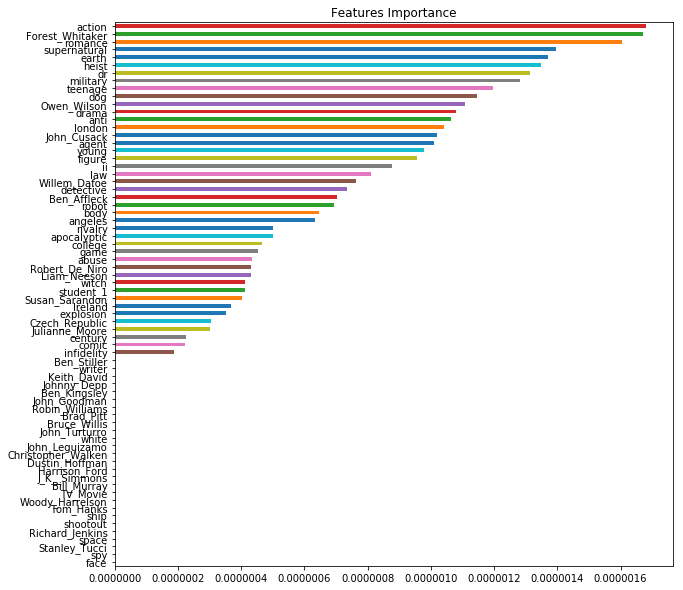

In [1152]:
lgbmodel.FI.mean(axis=1).sort_values()[180:250].plot(kind="barh",title = "Features Importance", figsize = (10,10))

In [194]:
train_data['Revenue_lgb'] = train_data["lgbfinal"]

print("RMSE model lgb :" ,score(train_data, train_data.Revenue_lgb),)

RMSE model lgb : 1.8796072404616064


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
test_data['revenue'] =  np.expm1(test_data["lgbfinal"])
test_data[['id','revenue']].to_csv('submission_lgb.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,4.173247e+06
3001,3002,2.293074e+06
3002,3003,7.928414e+06
3003,3004,1.080299e+07
3004,3005,7.253547e+05


In [1155]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_lgb.csv" -m "submission 15"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '  8%|▊         | 8.00k/100k [00:00<00:02, 32.4kB/s]',
 '100%|██████████| 100k/100k [00:01<00:00, 66.9kB/s] ',
 'Successfully submitted to TMDB Box Office Prediction']

### Cat boosting regression

In [196]:
from catboost import Pool, CatBoostRegressor

In [197]:
catmodel = CatBoostRegressor(iterations=10000, 
                                 learning_rate=0.01, 
                                 depth=5, 
                                 eval_metric='RMSE',
                                 colsample_bylevel=0.8,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200,
                                 random_state=123)

In [198]:
Kfolder.validate(train_data, test_data, features , catmodel, name="catfinal", prepare_stacking=True,
               fit_params={"use_best_model": True, "verbose": 100})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  0 :
0:	learn: 16.0664663	test: 16.2853215	best: 16.2853215 (0)	total: 129ms	remaining: 21m 32s
100:	learn: 6.4567820	test: 6.6609770	best: 6.6609770 (100)	total: 4.39s	remaining: 7m 9s
200:	learn: 3.2381693	test: 3.3881274	best: 3.3881274 (200)	total: 8.4s	remaining: 6m 49s
300:	learn: 2.3703893	test: 2.4478659	best: 2.4478659 (300)	total: 12.8s	remaining: 6m 52s
400:	learn: 2.1630757	test: 2.2030724	best: 2.2030724 (400)	total: 16.9s	remaining: 6m 44s
500:	learn: 2.0858993	test: 2.1178071	best: 2.1178071 (500)	total: 21s	remaining: 6m 37s
600:	learn: 2.0330532	test: 2.0726497	best: 2.0726497 (600)	total: 27.5s	remaining: 7m 9s
700:	learn: 1.9949105	test: 2.0374860	best: 2.0374555 (699)	total: 32.2s	remaining: 7m 7s
800:	learn: 1.9644695	test: 2.0121043	best: 2.0120291 (786)	total: 38s	remaining: 7m 16s
900:	learn: 1.9216076	test: 1.9713271	best: 1.9713271 (900)	total: 42.5s	remaining: 7m 9s
1000:	learn: 1.8769784	test: 1.9244719	best: 1.9244340 (999)	total: 47.1s	remaining: 7m 3

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  1 :
0:	learn: 16.1175461	test: 16.0221931	best: 16.0221931 (0)	total: 75.8ms	remaining: 12m 37s
100:	learn: 6.4690302	test: 6.3782572	best: 6.3782572 (100)	total: 4.47s	remaining: 7m 18s
200:	learn: 3.2271016	test: 3.1726115	best: 3.1726115 (200)	total: 8.51s	remaining: 6m 54s
300:	learn: 2.3539003	test: 2.3778646	best: 2.3778646 (300)	total: 12.6s	remaining: 6m 45s
400:	learn: 2.1361767	test: 2.2150327	best: 2.2150327 (400)	total: 16.8s	remaining: 6m 41s
500:	learn: 2.0475897	test: 2.1656372	best: 2.1656372 (500)	total: 21s	remaining: 6m 38s
600:	learn: 1.9673858	test: 2.1260654	best: 2.1260654 (600)	total: 25.1s	remaining: 6m 33s
700:	learn: 1.8998842	test: 2.0979135	best: 2.0979135 (700)	total: 29.3s	remaining: 6m 29s
800:	learn: 1.8427367	test: 2.0740798	best: 2.0738847 (795)	total: 33.5s	remaining: 6m 24s
900:	learn: 1.8040064	test: 2.0641267	best: 2.0641267 (900)	total: 37.5s	remaining: 6m 19s
1000:	learn: 1.7606266	test: 2.0511808	best: 2.0510204 (998)	total: 41.7s	remaini

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  2 :
0:	learn: 16.1018268	test: 16.1097230	best: 16.1097230 (0)	total: 55.2ms	remaining: 9m 11s
100:	learn: 6.4900459	test: 6.4298410	best: 6.4298410 (100)	total: 4.04s	remaining: 6m 35s
200:	learn: 3.2697201	test: 3.1157854	best: 3.1157854 (200)	total: 7.98s	remaining: 6m 28s
300:	learn: 2.3965350	test: 2.1872260	best: 2.1872260 (300)	total: 12.3s	remaining: 6m 37s
400:	learn: 2.1638544	test: 1.9712193	best: 1.9712193 (400)	total: 16.5s	remaining: 6m 34s
500:	learn: 2.0717607	test: 1.9111470	best: 1.9111470 (500)	total: 20.5s	remaining: 6m 29s
600:	learn: 2.0007392	test: 1.8856085	best: 1.8856085 (600)	total: 24.6s	remaining: 6m 25s
700:	learn: 1.9440143	test: 1.8678409	best: 1.8678409 (700)	total: 28.7s	remaining: 6m 20s
800:	learn: 1.8888931	test: 1.8582900	best: 1.8582883 (799)	total: 32.8s	remaining: 6m 16s
900:	learn: 1.8462362	test: 1.8468120	best: 1.8467210 (898)	total: 37.1s	remaining: 6m 14s
1000:	learn: 1.8052766	test: 1.8337385	best: 1.8337385 (1000)	total: 41.3s	remai

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  3 :
0:	learn: 16.1145174	test: 16.0451242	best: 16.0451242 (0)	total: 64.5ms	remaining: 10m 45s
100:	learn: 6.4676579	test: 6.4827259	best: 6.4827259 (100)	total: 4.14s	remaining: 6m 46s
200:	learn: 3.2134277	test: 3.3602621	best: 3.3602621 (200)	total: 8.32s	remaining: 6m 45s
300:	learn: 2.3116412	test: 2.5621708	best: 2.5621708 (300)	total: 12.4s	remaining: 6m 38s
400:	learn: 2.0865192	test: 2.3853315	best: 2.3853315 (400)	total: 16.6s	remaining: 6m 36s
500:	learn: 1.9966907	test: 2.3243395	best: 2.3243395 (500)	total: 20.5s	remaining: 6m 29s
600:	learn: 1.9375316	test: 2.2831866	best: 2.2831758 (599)	total: 24.6s	remaining: 6m 24s
700:	learn: 1.8887632	test: 2.2530028	best: 2.2530028 (700)	total: 28.8s	remaining: 6m 21s
800:	learn: 1.8432483	test: 2.2217787	best: 2.2217743 (799)	total: 32.7s	remaining: 6m 16s
900:	learn: 1.8123736	test: 2.2118784	best: 2.2112426 (885)	total: 37.2s	remaining: 6m 16s
1000:	learn: 1.7596899	test: 2.1727893	best: 2.1727893 (1000)	total: 41.2s	rema

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  4 :
0:	learn: 16.1189127	test: 16.0141128	best: 16.0141128 (0)	total: 60.2ms	remaining: 10m 1s
100:	learn: 6.4676646	test: 6.4538328	best: 6.4538328 (100)	total: 4.11s	remaining: 6m 42s
200:	learn: 3.2306899	test: 3.3368619	best: 3.3368619 (200)	total: 8.17s	remaining: 6m 38s
300:	learn: 2.3453508	test: 2.5132122	best: 2.5132122 (300)	total: 12.4s	remaining: 6m 38s
400:	learn: 2.1218960	test: 2.3023550	best: 2.3023550 (400)	total: 16.4s	remaining: 6m 31s
500:	learn: 2.0435147	test: 2.2330986	best: 2.2330986 (500)	total: 20.6s	remaining: 6m 30s
600:	learn: 1.9902182	test: 2.1934097	best: 2.1934097 (600)	total: 24.6s	remaining: 6m 24s
700:	learn: 1.9420028	test: 2.1517737	best: 2.1517737 (700)	total: 30.5s	remaining: 6m 44s
800:	learn: 1.9018134	test: 2.1290518	best: 2.1290518 (800)	total: 36s	remaining: 6m 53s
900:	learn: 1.8644318	test: 2.1095867	best: 2.1095867 (900)	total: 41.8s	remaining: 7m 2s
1000:	learn: 1.8160246	test: 2.0808356	best: 2.0808230 (999)	total: 48.1s	remaining

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  5 :
0:	learn: 16.0953078	test: 16.1390109	best: 16.1390109 (0)	total: 145ms	remaining: 24m 12s
100:	learn: 6.4779862	test: 6.4788271	best: 6.4788271 (100)	total: 6.99s	remaining: 11m 24s
200:	learn: 3.2680288	test: 3.1824394	best: 3.1824394 (200)	total: 12.1s	remaining: 9m 51s
300:	learn: 2.3984606	test: 2.2611573	best: 2.2611573 (300)	total: 17.5s	remaining: 9m 22s
400:	learn: 2.1764147	test: 2.0388917	best: 2.0388917 (400)	total: 23.2s	remaining: 9m 16s
500:	learn: 2.0984724	test: 1.9741689	best: 1.9741689 (500)	total: 28.6s	remaining: 9m 1s
600:	learn: 2.0506964	test: 1.9448803	best: 1.9448803 (600)	total: 33.3s	remaining: 8m 40s
700:	learn: 2.0039270	test: 1.9241691	best: 1.9241691 (700)	total: 37.9s	remaining: 8m 22s
800:	learn: 1.9734550	test: 1.9147276	best: 1.9147276 (800)	total: 44s	remaining: 8m 25s
900:	learn: 1.9521322	test: 1.9112800	best: 1.9107173 (891)	total: 49s	remaining: 8m 14s
1000:	learn: 1.8934127	test: 1.8946887	best: 1.8946887 (1000)	total: 53.9s	remaining

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Final score:  1.8906914544926314


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.8906914544926314

In [199]:
train_data['Revenue_cat'] = train_data["catfinal"]

print("RMSE model cat :" ,score(train_data, train_data.Revenue_cat))

RMSE model cat : 1.8951681461274552


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
test_data['revenue'] =  np.expm1(test_data["catfinal"])
test_data[['id','revenue']].to_csv('data/submission_cat.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,1.889477e+06
3001,3002,1.017553e+06
3002,3003,4.713473e+06
3003,3004,1.001618e+07
3004,3005,9.872963e+05


In [1164]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_cat.csv" -m "submission 16"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:00<00:00, 126kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

### model combination

In [1165]:
train_data['Revenue_Dragon1'] = 0.5 * train_data["xgbfinal"] + \
                               0.5 * train_data["catfinal"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1166]:
print("RMSE model Dragon1 :" ,score(train_data, train_data.Revenue_Dragon1))

RMSE model Dragon1 : 1.8948411501050064


In [1167]:
test_data['revenue'] =  np.expm1(0.5 * test_data["catfinal"] + 0.5 * test_data["xgbfinal"])
test_data[['id','revenue']].to_csv('data/submission_Dragon1.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,2.695537e+06
3001,3002,1.079901e+06
3002,3003,6.485242e+06
3003,3004,9.371612e+06
3004,3005,8.711928e+05


In [1168]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_dragon1.csv" -m "submission 17"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:01<00:00, 100kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

In [1169]:
train_data['Revenue_Dragon2'] = 0.45 * train_data["xgbfinal"] + \
                               0.55 * train_data["catfinal"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1170]:
print("RMSE model Dragon2 :" ,score(train_data, train_data.Revenue_Dragon2))

RMSE model Dragon2 : 1.8929578824245652


In [1171]:
test_data['revenue'] =  np.expm1(0.55 * test_data["catfinal"] + 0.45 * test_data["xgbfinal"])
test_data[['id','revenue']].to_csv('data/submission_Dragon2.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,2.603600e+06
3001,3002,1.076031e+06
3002,3003,6.338095e+06
3003,3004,9.430498e+06
3004,3005,8.848587e+05


In [1172]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_dragon2.csv" -m "submission 18"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:01<00:00, 96.2kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

In [202]:
train_data['Revenue_Dragon3'] = 0.5 * train_data["catfinal"] + 0.5* train_data['lgbfinal']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
print("RMSE model Dragon3 :" ,score(train_data, train_data.Revenue_Dragon3))

RMSE model Dragon3 : 1.8593322705768227


In [205]:
test_data['revenue'] =  np.expm1(0.5 * test_data["catfinal"] +
                                0.5 * test_data["lgbfinal"])
test_data[['id','revenue']].to_csv('data/submission_Dragon3.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,revenue
3000,3001,2.808070e+06
3001,3002,1.527522e+06
3002,3003,6.113131e+06
3003,3004,1.040215e+07
3004,3005,8.462506e+05


In [1180]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_dragon3.csv" -m "submission 20"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:01<00:00, 88.7kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

## Precision-Recall

In [206]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
catmodel.fit(X_train, y_train)

In [231]:
results = sklearn.model_selection.cross_validate(estimator=catmodel,
                                                 X = train_data,
                                                 y = train_data.Revenue_cat,
                                                 cv=5,
                                                 scoring = scoring)

0:	learn: 15.9823157	total: 62.7ms	remaining: 10m 26s
1:	learn: 15.8266937	total: 115ms	remaining: 9m 33s
2:	learn: 15.6731001	total: 170ms	remaining: 9m 24s
3:	learn: 15.5209422	total: 221ms	remaining: 9m 12s
4:	learn: 15.3705006	total: 309ms	remaining: 10m 17s
5:	learn: 15.2200151	total: 363ms	remaining: 10m 5s
6:	learn: 15.0708047	total: 417ms	remaining: 9m 54s
7:	learn: 14.9228500	total: 478ms	remaining: 9m 56s
8:	learn: 14.7779933	total: 601ms	remaining: 11m 7s
9:	learn: 14.6345309	total: 649ms	remaining: 10m 48s
10:	learn: 14.4920022	total: 721ms	remaining: 10m 54s
11:	learn: 14.3501734	total: 768ms	remaining: 10m 39s
12:	learn: 14.2094854	total: 847ms	remaining: 10m 50s
13:	learn: 14.0717272	total: 903ms	remaining: 10m 44s
14:	learn: 13.9354304	total: 964ms	remaining: 10m 41s
15:	learn: 13.7992812	total: 1.05s	remaining: 10m 53s
16:	learn: 13.6655599	total: 1.1s	remaining: 10m 43s
17:	learn: 13.5318115	total: 1.14s	remaining: 10m 33s
18:	learn: 13.4013911	total: 1.24s	remaining:

155:	learn: 3.6337548	total: 11s	remaining: 11m 31s
156:	learn: 3.5995855	total: 11s	remaining: 11m 30s
157:	learn: 3.5670640	total: 11.1s	remaining: 11m 31s
158:	learn: 3.5341217	total: 11.1s	remaining: 11m 29s
159:	learn: 3.5025914	total: 11.2s	remaining: 11m 27s
160:	learn: 3.4704245	total: 11.3s	remaining: 11m 29s
161:	learn: 3.4383521	total: 11.3s	remaining: 11m 28s
162:	learn: 3.4061965	total: 11.4s	remaining: 11m 28s
163:	learn: 3.3749762	total: 11.5s	remaining: 11m 27s
164:	learn: 3.3433605	total: 11.6s	remaining: 11m 29s
165:	learn: 3.3130471	total: 11.6s	remaining: 11m 28s
166:	learn: 3.2835681	total: 11.7s	remaining: 11m 27s
167:	learn: 3.2538940	total: 11.8s	remaining: 11m 29s
168:	learn: 3.2237329	total: 11.8s	remaining: 11m 27s
169:	learn: 3.1940535	total: 11.9s	remaining: 11m 25s
170:	learn: 3.1650126	total: 11.9s	remaining: 11m 24s
171:	learn: 3.1364236	total: 12s	remaining: 11m 25s
172:	learn: 3.1077875	total: 12s	remaining: 11m 23s
173:	learn: 3.0800191	total: 12.1s	r

310:	learn: 0.9580976	total: 22s	remaining: 11m 24s
311:	learn: 0.9510122	total: 22s	remaining: 11m 24s
312:	learn: 0.9431366	total: 22.1s	remaining: 11m 23s
313:	learn: 0.9362238	total: 22.1s	remaining: 11m 22s
314:	learn: 0.9292037	total: 22.2s	remaining: 11m 22s
315:	learn: 0.9222002	total: 22.3s	remaining: 11m 21s
316:	learn: 0.9152235	total: 22.3s	remaining: 11m 21s
317:	learn: 0.9085376	total: 22.4s	remaining: 11m 20s
318:	learn: 0.9016179	total: 22.4s	remaining: 11m 20s
319:	learn: 0.8945034	total: 22.5s	remaining: 11m 20s
320:	learn: 0.8875508	total: 22.6s	remaining: 11m 20s
321:	learn: 0.8809592	total: 22.6s	remaining: 11m 19s
322:	learn: 0.8746863	total: 22.7s	remaining: 11m 18s
323:	learn: 0.8684070	total: 22.7s	remaining: 11m 18s
324:	learn: 0.8619229	total: 22.8s	remaining: 11m 17s
325:	learn: 0.8554472	total: 22.8s	remaining: 11m 16s
326:	learn: 0.8485005	total: 22.9s	remaining: 11m 16s
327:	learn: 0.8417501	total: 22.9s	remaining: 11m 16s
328:	learn: 0.8351415	total: 23s

466:	learn: 0.3751119	total: 30.9s	remaining: 10m 30s
467:	learn: 0.3736064	total: 30.9s	remaining: 10m 29s
468:	learn: 0.3722918	total: 31s	remaining: 10m 29s
469:	learn: 0.3711496	total: 31s	remaining: 10m 29s
470:	learn: 0.3697837	total: 31.1s	remaining: 10m 29s
471:	learn: 0.3684825	total: 31.1s	remaining: 10m 28s
472:	learn: 0.3673679	total: 31.2s	remaining: 10m 28s
473:	learn: 0.3660828	total: 31.2s	remaining: 10m 27s
474:	learn: 0.3645717	total: 31.3s	remaining: 10m 27s
475:	learn: 0.3633526	total: 31.4s	remaining: 10m 27s
476:	learn: 0.3620680	total: 31.4s	remaining: 10m 27s
477:	learn: 0.3608066	total: 31.5s	remaining: 10m 26s
478:	learn: 0.3596494	total: 31.5s	remaining: 10m 26s
479:	learn: 0.3585726	total: 31.6s	remaining: 10m 26s
480:	learn: 0.3574595	total: 31.6s	remaining: 10m 26s
481:	learn: 0.3562047	total: 31.7s	remaining: 10m 25s
482:	learn: 0.3551251	total: 31.7s	remaining: 10m 25s
483:	learn: 0.3539166	total: 31.8s	remaining: 10m 25s
484:	learn: 0.3526072	total: 31.

620:	learn: 0.2767179	total: 39.5s	remaining: 9m 56s
621:	learn: 0.2763447	total: 39.6s	remaining: 9m 56s
622:	learn: 0.2761916	total: 39.6s	remaining: 9m 56s
623:	learn: 0.2758822	total: 39.7s	remaining: 9m 56s
624:	learn: 0.2757356	total: 39.7s	remaining: 9m 55s
625:	learn: 0.2756180	total: 39.8s	remaining: 9m 55s
626:	learn: 0.2754242	total: 39.9s	remaining: 9m 55s
627:	learn: 0.2751864	total: 39.9s	remaining: 9m 55s
628:	learn: 0.2750621	total: 39.9s	remaining: 9m 55s
629:	learn: 0.2747940	total: 40s	remaining: 9m 54s
630:	learn: 0.2745759	total: 40.1s	remaining: 9m 55s
631:	learn: 0.2743862	total: 40.1s	remaining: 9m 54s
632:	learn: 0.2742138	total: 40.2s	remaining: 9m 54s
633:	learn: 0.2740588	total: 40.2s	remaining: 9m 53s
634:	learn: 0.2739277	total: 40.3s	remaining: 9m 54s
635:	learn: 0.2738152	total: 40.3s	remaining: 9m 53s
636:	learn: 0.2736347	total: 40.4s	remaining: 9m 53s
637:	learn: 0.2734791	total: 40.5s	remaining: 9m 54s
638:	learn: 0.2732402	total: 40.6s	remaining: 9m

776:	learn: 0.2600187	total: 51.5s	remaining: 10m 11s
777:	learn: 0.2597486	total: 51.6s	remaining: 10m 11s
778:	learn: 0.2597313	total: 51.6s	remaining: 10m 11s
779:	learn: 0.2597204	total: 51.7s	remaining: 10m 11s
780:	learn: 0.2597078	total: 51.8s	remaining: 10m 11s
781:	learn: 0.2596712	total: 51.9s	remaining: 10m 11s
782:	learn: 0.2595558	total: 52s	remaining: 10m 11s
783:	learn: 0.2595271	total: 52s	remaining: 10m 11s
784:	learn: 0.2595020	total: 52.1s	remaining: 10m 11s
785:	learn: 0.2594638	total: 52.2s	remaining: 10m 12s
786:	learn: 0.2594480	total: 52.3s	remaining: 10m 12s
787:	learn: 0.2594297	total: 52.4s	remaining: 10m 12s
788:	learn: 0.2592190	total: 52.5s	remaining: 10m 13s
789:	learn: 0.2589446	total: 52.6s	remaining: 10m 13s
790:	learn: 0.2589303	total: 52.7s	remaining: 10m 13s
791:	learn: 0.2585731	total: 52.7s	remaining: 10m 13s
792:	learn: 0.2585395	total: 52.9s	remaining: 10m 13s
793:	learn: 0.2584894	total: 52.9s	remaining: 10m 13s
794:	learn: 0.2584833	total: 53s

932:	learn: 0.2505435	total: 1m 1s	remaining: 9m 56s
933:	learn: 0.2505152	total: 1m 1s	remaining: 9m 56s
934:	learn: 0.2504761	total: 1m 1s	remaining: 9m 56s
935:	learn: 0.2504569	total: 1m 1s	remaining: 9m 56s
936:	learn: 0.2504240	total: 1m 1s	remaining: 9m 56s
937:	learn: 0.2499656	total: 1m 1s	remaining: 9m 56s
938:	learn: 0.2499567	total: 1m 1s	remaining: 9m 56s
939:	learn: 0.2498931	total: 1m 1s	remaining: 9m 55s
940:	learn: 0.2498638	total: 1m 1s	remaining: 9m 55s
941:	learn: 0.2496429	total: 1m 1s	remaining: 9m 55s
942:	learn: 0.2496153	total: 1m 1s	remaining: 9m 55s
943:	learn: 0.2495876	total: 1m 2s	remaining: 9m 55s
944:	learn: 0.2495602	total: 1m 2s	remaining: 9m 55s
945:	learn: 0.2495433	total: 1m 2s	remaining: 9m 54s
946:	learn: 0.2495002	total: 1m 2s	remaining: 9m 54s
947:	learn: 0.2494576	total: 1m 2s	remaining: 9m 54s
948:	learn: 0.2494237	total: 1m 2s	remaining: 9m 55s
949:	learn: 0.2494144	total: 1m 2s	remaining: 9m 55s
950:	learn: 0.2493884	total: 1m 2s	remaining: 

1085:	learn: 0.2409075	total: 1m 11s	remaining: 9m 50s
1086:	learn: 0.2408957	total: 1m 11s	remaining: 9m 50s
1087:	learn: 0.2408802	total: 1m 12s	remaining: 9m 50s
1088:	learn: 0.2408620	total: 1m 12s	remaining: 9m 50s
1089:	learn: 0.2408449	total: 1m 12s	remaining: 9m 49s
1090:	learn: 0.2404944	total: 1m 12s	remaining: 9m 49s
1091:	learn: 0.2404776	total: 1m 12s	remaining: 9m 49s
1092:	learn: 0.2404615	total: 1m 12s	remaining: 9m 49s
1093:	learn: 0.2404466	total: 1m 12s	remaining: 9m 49s
1094:	learn: 0.2404353	total: 1m 12s	remaining: 9m 49s
1095:	learn: 0.2401118	total: 1m 12s	remaining: 9m 49s
1096:	learn: 0.2400988	total: 1m 12s	remaining: 9m 48s
1097:	learn: 0.2400815	total: 1m 12s	remaining: 9m 48s
1098:	learn: 0.2399783	total: 1m 12s	remaining: 9m 49s
1099:	learn: 0.2399643	total: 1m 12s	remaining: 9m 48s
1100:	learn: 0.2399221	total: 1m 12s	remaining: 9m 48s
1101:	learn: 0.2398692	total: 1m 12s	remaining: 9m 48s
1102:	learn: 0.2398509	total: 1m 12s	remaining: 9m 48s
1103:	lear

1234:	learn: 0.2323410	total: 1m 24s	remaining: 9m 57s
1235:	learn: 0.2323324	total: 1m 24s	remaining: 9m 57s
1236:	learn: 0.2323046	total: 1m 24s	remaining: 9m 57s
1237:	learn: 0.2319284	total: 1m 24s	remaining: 9m 57s
1238:	learn: 0.2319157	total: 1m 24s	remaining: 9m 57s
1239:	learn: 0.2319030	total: 1m 24s	remaining: 9m 57s
1240:	learn: 0.2318853	total: 1m 24s	remaining: 9m 57s
1241:	learn: 0.2318781	total: 1m 24s	remaining: 9m 57s
1242:	learn: 0.2318543	total: 1m 24s	remaining: 9m 57s
1243:	learn: 0.2318441	total: 1m 24s	remaining: 9m 57s
1244:	learn: 0.2318350	total: 1m 25s	remaining: 9m 58s
1245:	learn: 0.2315662	total: 1m 25s	remaining: 9m 58s
1246:	learn: 0.2315457	total: 1m 25s	remaining: 9m 58s
1247:	learn: 0.2315124	total: 1m 25s	remaining: 9m 58s
1248:	learn: 0.2314993	total: 1m 25s	remaining: 9m 58s
1249:	learn: 0.2314610	total: 1m 25s	remaining: 9m 58s
1250:	learn: 0.2311943	total: 1m 25s	remaining: 9m 58s
1251:	learn: 0.2311835	total: 1m 25s	remaining: 9m 58s
1252:	lear

1384:	learn: 0.2271589	total: 1m 36s	remaining: 9m 57s
1385:	learn: 0.2271523	total: 1m 36s	remaining: 9m 57s
1386:	learn: 0.2271357	total: 1m 36s	remaining: 9m 57s
1387:	learn: 0.2271286	total: 1m 36s	remaining: 9m 57s
1388:	learn: 0.2271126	total: 1m 36s	remaining: 9m 57s
1389:	learn: 0.2271088	total: 1m 36s	remaining: 9m 57s
1390:	learn: 0.2270994	total: 1m 36s	remaining: 9m 57s
1391:	learn: 0.2270913	total: 1m 36s	remaining: 9m 57s
1392:	learn: 0.2270744	total: 1m 36s	remaining: 9m 57s
1393:	learn: 0.2270705	total: 1m 36s	remaining: 9m 57s
1394:	learn: 0.2268321	total: 1m 36s	remaining: 9m 58s
1395:	learn: 0.2266491	total: 1m 37s	remaining: 9m 58s
1396:	learn: 0.2264087	total: 1m 37s	remaining: 9m 58s
1397:	learn: 0.2264032	total: 1m 37s	remaining: 9m 58s
1398:	learn: 0.2263961	total: 1m 37s	remaining: 9m 58s
1399:	learn: 0.2263868	total: 1m 37s	remaining: 9m 58s
1400:	learn: 0.2263829	total: 1m 37s	remaining: 9m 59s
1401:	learn: 0.2261287	total: 1m 37s	remaining: 9m 59s
1402:	lear

1535:	learn: 0.2226949	total: 1m 47s	remaining: 9m 49s
1536:	learn: 0.2226915	total: 1m 47s	remaining: 9m 49s
1537:	learn: 0.2226861	total: 1m 47s	remaining: 9m 49s
1538:	learn: 0.2226819	total: 1m 47s	remaining: 9m 49s
1539:	learn: 0.2226725	total: 1m 47s	remaining: 9m 49s
1540:	learn: 0.2226638	total: 1m 47s	remaining: 9m 49s
1541:	learn: 0.2226591	total: 1m 47s	remaining: 9m 48s
1542:	learn: 0.2226554	total: 1m 47s	remaining: 9m 48s
1543:	learn: 0.2226408	total: 1m 47s	remaining: 9m 48s
1544:	learn: 0.2226374	total: 1m 47s	remaining: 9m 48s
1545:	learn: 0.2226266	total: 1m 47s	remaining: 9m 48s
1546:	learn: 0.2226220	total: 1m 47s	remaining: 9m 48s
1547:	learn: 0.2226134	total: 1m 47s	remaining: 9m 48s
1548:	learn: 0.2223717	total: 1m 47s	remaining: 9m 48s
1549:	learn: 0.2223623	total: 1m 47s	remaining: 9m 48s
1550:	learn: 0.2223587	total: 1m 47s	remaining: 9m 48s
1551:	learn: 0.2223534	total: 1m 48s	remaining: 9m 47s
1552:	learn: 0.2223510	total: 1m 48s	remaining: 9m 47s
1553:	lear

1685:	learn: 0.2197444	total: 1m 56s	remaining: 9m 35s
1686:	learn: 0.2197406	total: 1m 56s	remaining: 9m 35s
1687:	learn: 0.2197155	total: 1m 56s	remaining: 9m 35s
1688:	learn: 0.2197026	total: 1m 56s	remaining: 9m 35s
1689:	learn: 0.2196997	total: 1m 57s	remaining: 9m 35s
1690:	learn: 0.2196967	total: 1m 57s	remaining: 9m 35s
1691:	learn: 0.2196868	total: 1m 57s	remaining: 9m 35s
1692:	learn: 0.2196823	total: 1m 57s	remaining: 9m 35s
1693:	learn: 0.2195330	total: 1m 57s	remaining: 9m 35s
1694:	learn: 0.2195280	total: 1m 57s	remaining: 9m 35s
1695:	learn: 0.2195258	total: 1m 57s	remaining: 9m 35s
1696:	learn: 0.2195230	total: 1m 57s	remaining: 9m 35s
1697:	learn: 0.2195138	total: 1m 57s	remaining: 9m 35s
1698:	learn: 0.2195072	total: 1m 57s	remaining: 9m 35s
1699:	learn: 0.2195040	total: 1m 57s	remaining: 9m 35s
1700:	learn: 0.2194988	total: 1m 57s	remaining: 9m 35s
1701:	learn: 0.2194960	total: 1m 57s	remaining: 9m 35s
1702:	learn: 0.2194931	total: 1m 58s	remaining: 9m 35s
1703:	lear

1839:	learn: 0.2172988	total: 2m 5s	remaining: 9m 15s
1840:	learn: 0.2172912	total: 2m 5s	remaining: 9m 15s
1841:	learn: 0.2172890	total: 2m 5s	remaining: 9m 15s
1842:	learn: 0.2172866	total: 2m 5s	remaining: 9m 14s
1843:	learn: 0.2172816	total: 2m 5s	remaining: 9m 14s
1844:	learn: 0.2172690	total: 2m 5s	remaining: 9m 14s
1845:	learn: 0.2172638	total: 2m 5s	remaining: 9m 14s
1846:	learn: 0.2172605	total: 2m 5s	remaining: 9m 14s
1847:	learn: 0.2172581	total: 2m 5s	remaining: 9m 14s
1848:	learn: 0.2172560	total: 2m 5s	remaining: 9m 14s
1849:	learn: 0.2172543	total: 2m 5s	remaining: 9m 14s
1850:	learn: 0.2172519	total: 2m 5s	remaining: 9m 13s
1851:	learn: 0.2172484	total: 2m 5s	remaining: 9m 13s
1852:	learn: 0.2170286	total: 2m 5s	remaining: 9m 13s
1853:	learn: 0.2170258	total: 2m 5s	remaining: 9m 13s
1854:	learn: 0.2170163	total: 2m 6s	remaining: 9m 13s
1855:	learn: 0.2170146	total: 2m 6s	remaining: 9m 13s
1856:	learn: 0.2170081	total: 2m 6s	remaining: 9m 13s
1857:	learn: 0.2169147	total

1992:	learn: 0.2146951	total: 2m 15s	remaining: 9m 2s
1993:	learn: 0.2146900	total: 2m 15s	remaining: 9m 2s
1994:	learn: 0.2146837	total: 2m 15s	remaining: 9m 2s
1995:	learn: 0.2146810	total: 2m 15s	remaining: 9m 3s
1996:	learn: 0.2145680	total: 2m 15s	remaining: 9m 3s
1997:	learn: 0.2145661	total: 2m 15s	remaining: 9m 3s
1998:	learn: 0.2145590	total: 2m 15s	remaining: 9m 3s
1999:	learn: 0.2145571	total: 2m 15s	remaining: 9m 3s
2000:	learn: 0.2145374	total: 2m 16s	remaining: 9m 3s
2001:	learn: 0.2145347	total: 2m 16s	remaining: 9m 4s
2002:	learn: 0.2144260	total: 2m 16s	remaining: 9m 4s
2003:	learn: 0.2144228	total: 2m 16s	remaining: 9m 5s
2004:	learn: 0.2143584	total: 2m 16s	remaining: 9m 5s
2005:	learn: 0.2143543	total: 2m 16s	remaining: 9m 5s
2006:	learn: 0.2143524	total: 2m 17s	remaining: 9m 5s
2007:	learn: 0.2143505	total: 2m 17s	remaining: 9m 5s
2008:	learn: 0.2143447	total: 2m 17s	remaining: 9m 5s
2009:	learn: 0.2143363	total: 2m 17s	remaining: 9m 6s
2010:	learn: 0.2143250	total

2146:	learn: 0.2113301	total: 2m 26s	remaining: 8m 56s
2147:	learn: 0.2113275	total: 2m 26s	remaining: 8m 56s
2148:	learn: 0.2113196	total: 2m 26s	remaining: 8m 56s
2149:	learn: 0.2113151	total: 2m 26s	remaining: 8m 56s
2150:	learn: 0.2113132	total: 2m 26s	remaining: 8m 56s
2151:	learn: 0.2113118	total: 2m 26s	remaining: 8m 56s
2152:	learn: 0.2113023	total: 2m 27s	remaining: 8m 56s
2153:	learn: 0.2112935	total: 2m 27s	remaining: 8m 56s
2154:	learn: 0.2112856	total: 2m 27s	remaining: 8m 56s
2155:	learn: 0.2112840	total: 2m 27s	remaining: 8m 56s
2156:	learn: 0.2112796	total: 2m 27s	remaining: 8m 56s
2157:	learn: 0.2112777	total: 2m 27s	remaining: 8m 56s
2158:	learn: 0.2112080	total: 2m 27s	remaining: 8m 55s
2159:	learn: 0.2112015	total: 2m 27s	remaining: 8m 55s
2160:	learn: 0.2111981	total: 2m 27s	remaining: 8m 55s
2161:	learn: 0.2111958	total: 2m 27s	remaining: 8m 55s
2162:	learn: 0.2111918	total: 2m 27s	remaining: 8m 55s
2163:	learn: 0.2111872	total: 2m 27s	remaining: 8m 55s
2164:	lear

2295:	learn: 0.2094180	total: 2m 37s	remaining: 8m 46s
2296:	learn: 0.2094124	total: 2m 37s	remaining: 8m 46s
2297:	learn: 0.2094088	total: 2m 37s	remaining: 8m 46s
2298:	learn: 0.2092084	total: 2m 37s	remaining: 8m 46s
2299:	learn: 0.2092029	total: 2m 37s	remaining: 8m 47s
2300:	learn: 0.2091991	total: 2m 37s	remaining: 8m 47s
2301:	learn: 0.2091905	total: 2m 37s	remaining: 8m 47s
2302:	learn: 0.2091870	total: 2m 37s	remaining: 8m 47s
2303:	learn: 0.2089616	total: 2m 37s	remaining: 8m 47s
2304:	learn: 0.2089603	total: 2m 37s	remaining: 8m 47s
2305:	learn: 0.2089563	total: 2m 38s	remaining: 8m 47s
2306:	learn: 0.2089530	total: 2m 38s	remaining: 8m 47s
2307:	learn: 0.2089514	total: 2m 38s	remaining: 8m 47s
2308:	learn: 0.2089448	total: 2m 38s	remaining: 8m 47s
2309:	learn: 0.2089326	total: 2m 38s	remaining: 8m 48s
2310:	learn: 0.2089125	total: 2m 38s	remaining: 8m 48s
2311:	learn: 0.2089089	total: 2m 38s	remaining: 8m 48s
2312:	learn: 0.2089004	total: 2m 38s	remaining: 8m 48s
2313:	lear

2444:	learn: 0.2047260	total: 2m 51s	remaining: 8m 50s
2445:	learn: 0.2047238	total: 2m 51s	remaining: 8m 50s
2446:	learn: 0.2047167	total: 2m 51s	remaining: 8m 50s
2447:	learn: 0.2047108	total: 2m 51s	remaining: 8m 50s
2448:	learn: 0.2046949	total: 2m 52s	remaining: 8m 50s
2449:	learn: 0.2046773	total: 2m 52s	remaining: 8m 50s
2450:	learn: 0.2046722	total: 2m 52s	remaining: 8m 50s
2451:	learn: 0.2046700	total: 2m 52s	remaining: 8m 50s
2452:	learn: 0.2045656	total: 2m 52s	remaining: 8m 51s
2453:	learn: 0.2045567	total: 2m 52s	remaining: 8m 51s
2454:	learn: 0.2044092	total: 2m 52s	remaining: 8m 51s
2455:	learn: 0.2043846	total: 2m 52s	remaining: 8m 50s
2456:	learn: 0.2043830	total: 2m 52s	remaining: 8m 50s
2457:	learn: 0.2043773	total: 2m 53s	remaining: 8m 50s
2458:	learn: 0.2043753	total: 2m 53s	remaining: 8m 50s
2459:	learn: 0.2042701	total: 2m 53s	remaining: 8m 50s
2460:	learn: 0.2042681	total: 2m 53s	remaining: 8m 50s
2461:	learn: 0.2042626	total: 2m 53s	remaining: 8m 50s
2462:	lear

2596:	learn: 0.2013641	total: 3m 3s	remaining: 8m 44s
2597:	learn: 0.2013607	total: 3m 4s	remaining: 8m 44s
2598:	learn: 0.2013547	total: 3m 4s	remaining: 8m 44s
2599:	learn: 0.2013528	total: 3m 4s	remaining: 8m 44s
2600:	learn: 0.2013484	total: 3m 4s	remaining: 8m 44s
2601:	learn: 0.2013440	total: 3m 4s	remaining: 8m 44s
2602:	learn: 0.2010739	total: 3m 4s	remaining: 8m 44s
2603:	learn: 0.2008075	total: 3m 4s	remaining: 8m 44s
2604:	learn: 0.2008059	total: 3m 4s	remaining: 8m 44s
2605:	learn: 0.2008024	total: 3m 4s	remaining: 8m 44s
2606:	learn: 0.2008011	total: 3m 4s	remaining: 8m 44s
2607:	learn: 0.2007981	total: 3m 4s	remaining: 8m 44s
2608:	learn: 0.2007965	total: 3m 4s	remaining: 8m 44s
2609:	learn: 0.2007934	total: 3m 5s	remaining: 8m 44s
2610:	learn: 0.2005384	total: 3m 5s	remaining: 8m 43s
2611:	learn: 0.2005348	total: 3m 5s	remaining: 8m 43s
2612:	learn: 0.2005277	total: 3m 5s	remaining: 8m 43s
2613:	learn: 0.2005245	total: 3m 5s	remaining: 8m 43s
2614:	learn: 0.2005229	total

2748:	learn: 0.1985289	total: 3m 13s	remaining: 8m 30s
2749:	learn: 0.1985151	total: 3m 13s	remaining: 8m 30s
2750:	learn: 0.1985113	total: 3m 13s	remaining: 8m 30s
2751:	learn: 0.1985091	total: 3m 14s	remaining: 8m 30s
2752:	learn: 0.1985068	total: 3m 14s	remaining: 8m 30s
2753:	learn: 0.1984546	total: 3m 14s	remaining: 8m 30s
2754:	learn: 0.1984501	total: 3m 14s	remaining: 8m 30s
2755:	learn: 0.1984468	total: 3m 14s	remaining: 8m 30s
2756:	learn: 0.1983855	total: 3m 14s	remaining: 8m 30s
2757:	learn: 0.1983819	total: 3m 14s	remaining: 8m 30s
2758:	learn: 0.1981677	total: 3m 14s	remaining: 8m 30s
2759:	learn: 0.1981535	total: 3m 14s	remaining: 8m 30s
2760:	learn: 0.1981482	total: 3m 14s	remaining: 8m 30s
2761:	learn: 0.1981442	total: 3m 14s	remaining: 8m 29s
2762:	learn: 0.1979506	total: 3m 14s	remaining: 8m 29s
2763:	learn: 0.1979498	total: 3m 14s	remaining: 8m 29s
2764:	learn: 0.1979454	total: 3m 14s	remaining: 8m 29s
2765:	learn: 0.1978828	total: 3m 14s	remaining: 8m 29s
2766:	lear

2898:	learn: 0.1951278	total: 3m 24s	remaining: 8m 21s
2899:	learn: 0.1951233	total: 3m 24s	remaining: 8m 20s
2900:	learn: 0.1951188	total: 3m 24s	remaining: 8m 20s
2901:	learn: 0.1951141	total: 3m 24s	remaining: 8m 20s
2902:	learn: 0.1951126	total: 3m 24s	remaining: 8m 20s
2903:	learn: 0.1949497	total: 3m 24s	remaining: 8m 20s
2904:	learn: 0.1949448	total: 3m 24s	remaining: 8m 20s
2905:	learn: 0.1949407	total: 3m 24s	remaining: 8m 20s
2906:	learn: 0.1949370	total: 3m 25s	remaining: 8m 20s
2907:	learn: 0.1949187	total: 3m 25s	remaining: 8m 20s
2908:	learn: 0.1949142	total: 3m 25s	remaining: 8m 20s
2909:	learn: 0.1949118	total: 3m 25s	remaining: 8m 20s
2910:	learn: 0.1948974	total: 3m 25s	remaining: 8m 20s
2911:	learn: 0.1948928	total: 3m 25s	remaining: 8m 20s
2912:	learn: 0.1948883	total: 3m 25s	remaining: 8m 20s
2913:	learn: 0.1948413	total: 3m 25s	remaining: 8m 19s
2914:	learn: 0.1948400	total: 3m 25s	remaining: 8m 19s
2915:	learn: 0.1948387	total: 3m 25s	remaining: 8m 19s
2916:	lear

3048:	learn: 0.1928588	total: 3m 34s	remaining: 8m 8s
3049:	learn: 0.1928559	total: 3m 34s	remaining: 8m 8s
3050:	learn: 0.1928525	total: 3m 34s	remaining: 8m 8s
3051:	learn: 0.1928512	total: 3m 34s	remaining: 8m 7s
3052:	learn: 0.1927142	total: 3m 34s	remaining: 8m 8s
3053:	learn: 0.1927084	total: 3m 34s	remaining: 8m 7s
3054:	learn: 0.1927060	total: 3m 34s	remaining: 8m 7s
3055:	learn: 0.1927031	total: 3m 34s	remaining: 8m 7s
3056:	learn: 0.1927002	total: 3m 34s	remaining: 8m 7s
3057:	learn: 0.1925505	total: 3m 34s	remaining: 8m 7s
3058:	learn: 0.1925477	total: 3m 34s	remaining: 8m 7s
3059:	learn: 0.1925452	total: 3m 34s	remaining: 8m 7s
3060:	learn: 0.1925412	total: 3m 34s	remaining: 8m 7s
3061:	learn: 0.1925382	total: 3m 35s	remaining: 8m 7s
3062:	learn: 0.1925354	total: 3m 35s	remaining: 8m 7s
3063:	learn: 0.1925336	total: 3m 35s	remaining: 8m 7s
3064:	learn: 0.1925325	total: 3m 35s	remaining: 8m 7s
3065:	learn: 0.1925296	total: 3m 35s	remaining: 8m 7s
3066:	learn: 0.1925274	total

3204:	learn: 0.1907868	total: 3m 46s	remaining: 7m 59s
3205:	learn: 0.1907827	total: 3m 46s	remaining: 7m 59s
3206:	learn: 0.1907804	total: 3m 46s	remaining: 7m 59s
3207:	learn: 0.1907791	total: 3m 46s	remaining: 7m 59s
3208:	learn: 0.1907777	total: 3m 46s	remaining: 7m 59s
3209:	learn: 0.1907687	total: 3m 46s	remaining: 7m 59s
3210:	learn: 0.1907668	total: 3m 46s	remaining: 7m 59s
3211:	learn: 0.1907645	total: 3m 46s	remaining: 7m 59s
3212:	learn: 0.1907633	total: 3m 46s	remaining: 7m 59s
3213:	learn: 0.1907615	total: 3m 46s	remaining: 7m 59s
3214:	learn: 0.1907607	total: 3m 46s	remaining: 7m 58s
3215:	learn: 0.1907574	total: 3m 46s	remaining: 7m 58s
3216:	learn: 0.1907507	total: 3m 47s	remaining: 7m 58s
3217:	learn: 0.1907479	total: 3m 47s	remaining: 7m 58s
3218:	learn: 0.1907415	total: 3m 47s	remaining: 7m 58s
3219:	learn: 0.1907407	total: 3m 47s	remaining: 7m 58s
3220:	learn: 0.1907377	total: 3m 47s	remaining: 7m 58s
3221:	learn: 0.1906639	total: 3m 47s	remaining: 7m 58s
3222:	lear

3354:	learn: 0.1888060	total: 3m 57s	remaining: 7m 49s
3355:	learn: 0.1888053	total: 3m 57s	remaining: 7m 49s
3356:	learn: 0.1888047	total: 3m 57s	remaining: 7m 49s
3357:	learn: 0.1887953	total: 3m 57s	remaining: 7m 49s
3358:	learn: 0.1887861	total: 3m 57s	remaining: 7m 49s
3359:	learn: 0.1887842	total: 3m 57s	remaining: 7m 49s
3360:	learn: 0.1887831	total: 3m 57s	remaining: 7m 48s
3361:	learn: 0.1887825	total: 3m 57s	remaining: 7m 48s
3362:	learn: 0.1887819	total: 3m 57s	remaining: 7m 48s
3363:	learn: 0.1887729	total: 3m 57s	remaining: 7m 48s
3364:	learn: 0.1886268	total: 3m 57s	remaining: 7m 48s
3365:	learn: 0.1886252	total: 3m 57s	remaining: 7m 48s
3366:	learn: 0.1885283	total: 3m 57s	remaining: 7m 48s
3367:	learn: 0.1885160	total: 3m 57s	remaining: 7m 48s
3368:	learn: 0.1885145	total: 3m 57s	remaining: 7m 48s
3369:	learn: 0.1885130	total: 3m 57s	remaining: 7m 48s
3370:	learn: 0.1885115	total: 3m 58s	remaining: 7m 48s
3371:	learn: 0.1882948	total: 3m 58s	remaining: 7m 48s
3372:	lear

3508:	learn: 0.1871333	total: 4m 6s	remaining: 7m 36s
3509:	learn: 0.1871327	total: 4m 6s	remaining: 7m 36s
3510:	learn: 0.1871307	total: 4m 6s	remaining: 7m 36s
3511:	learn: 0.1871295	total: 4m 6s	remaining: 7m 36s
3512:	learn: 0.1871272	total: 4m 6s	remaining: 7m 35s
3513:	learn: 0.1871259	total: 4m 6s	remaining: 7m 35s
3514:	learn: 0.1871254	total: 4m 7s	remaining: 7m 35s
3515:	learn: 0.1871242	total: 4m 7s	remaining: 7m 35s
3516:	learn: 0.1871237	total: 4m 7s	remaining: 7m 35s
3517:	learn: 0.1871230	total: 4m 7s	remaining: 7m 35s
3518:	learn: 0.1871219	total: 4m 7s	remaining: 7m 35s
3519:	learn: 0.1871211	total: 4m 7s	remaining: 7m 35s
3520:	learn: 0.1871207	total: 4m 7s	remaining: 7m 35s
3521:	learn: 0.1871198	total: 4m 7s	remaining: 7m 35s
3522:	learn: 0.1871190	total: 4m 7s	remaining: 7m 35s
3523:	learn: 0.1871175	total: 4m 7s	remaining: 7m 35s
3524:	learn: 0.1871167	total: 4m 7s	remaining: 7m 35s
3525:	learn: 0.1871160	total: 4m 7s	remaining: 7m 35s
3526:	learn: 0.1871147	total

3659:	learn: 0.1846737	total: 4m 17s	remaining: 7m 25s
3660:	learn: 0.1846713	total: 4m 17s	remaining: 7m 25s
3661:	learn: 0.1846582	total: 4m 17s	remaining: 7m 25s
3662:	learn: 0.1844691	total: 4m 17s	remaining: 7m 25s
3663:	learn: 0.1844677	total: 4m 17s	remaining: 7m 25s
3664:	learn: 0.1844663	total: 4m 17s	remaining: 7m 25s
3665:	learn: 0.1844583	total: 4m 17s	remaining: 7m 25s
3666:	learn: 0.1844545	total: 4m 17s	remaining: 7m 25s
3667:	learn: 0.1844469	total: 4m 18s	remaining: 7m 25s
3668:	learn: 0.1844463	total: 4m 18s	remaining: 7m 25s
3669:	learn: 0.1842845	total: 4m 18s	remaining: 7m 25s
3670:	learn: 0.1842821	total: 4m 18s	remaining: 7m 25s
3671:	learn: 0.1842810	total: 4m 18s	remaining: 7m 25s
3672:	learn: 0.1842797	total: 4m 18s	remaining: 7m 25s
3673:	learn: 0.1842688	total: 4m 18s	remaining: 7m 24s
3674:	learn: 0.1842658	total: 4m 18s	remaining: 7m 24s
3675:	learn: 0.1842636	total: 4m 18s	remaining: 7m 24s
3676:	learn: 0.1842613	total: 4m 18s	remaining: 7m 24s
3677:	lear

3811:	learn: 0.1814357	total: 4m 29s	remaining: 7m 17s
3812:	learn: 0.1814333	total: 4m 29s	remaining: 7m 17s
3813:	learn: 0.1814324	total: 4m 29s	remaining: 7m 17s
3814:	learn: 0.1814318	total: 4m 29s	remaining: 7m 17s
3815:	learn: 0.1814267	total: 4m 29s	remaining: 7m 17s
3816:	learn: 0.1812563	total: 4m 29s	remaining: 7m 17s
3817:	learn: 0.1812493	total: 4m 30s	remaining: 7m 17s
3818:	learn: 0.1812376	total: 4m 30s	remaining: 7m 17s
3819:	learn: 0.1812368	total: 4m 30s	remaining: 7m 16s
3820:	learn: 0.1812353	total: 4m 30s	remaining: 7m 16s
3821:	learn: 0.1812014	total: 4m 30s	remaining: 7m 16s
3822:	learn: 0.1811943	total: 4m 30s	remaining: 7m 16s
3823:	learn: 0.1811887	total: 4m 30s	remaining: 7m 16s
3824:	learn: 0.1811837	total: 4m 30s	remaining: 7m 16s
3825:	learn: 0.1810603	total: 4m 30s	remaining: 7m 16s
3826:	learn: 0.1810581	total: 4m 30s	remaining: 7m 16s
3827:	learn: 0.1810507	total: 4m 30s	remaining: 7m 16s
3828:	learn: 0.1810450	total: 4m 30s	remaining: 7m 16s
3829:	lear

3961:	learn: 0.1782507	total: 4m 40s	remaining: 7m 7s
3962:	learn: 0.1782438	total: 4m 40s	remaining: 7m 7s
3963:	learn: 0.1782427	total: 4m 40s	remaining: 7m 7s
3964:	learn: 0.1782421	total: 4m 40s	remaining: 7m 7s
3965:	learn: 0.1782414	total: 4m 40s	remaining: 7m 7s
3966:	learn: 0.1782370	total: 4m 40s	remaining: 7m 7s
3967:	learn: 0.1782368	total: 4m 40s	remaining: 7m 6s
3968:	learn: 0.1782364	total: 4m 40s	remaining: 7m 6s
3969:	learn: 0.1782321	total: 4m 41s	remaining: 7m 6s
3970:	learn: 0.1781167	total: 4m 41s	remaining: 7m 6s
3971:	learn: 0.1781146	total: 4m 41s	remaining: 7m 6s
3972:	learn: 0.1781138	total: 4m 41s	remaining: 7m 6s
3973:	learn: 0.1781123	total: 4m 41s	remaining: 7m 6s
3974:	learn: 0.1779573	total: 4m 41s	remaining: 7m 6s
3975:	learn: 0.1778017	total: 4m 41s	remaining: 7m 6s
3976:	learn: 0.1777960	total: 4m 41s	remaining: 7m 6s
3977:	learn: 0.1777953	total: 4m 41s	remaining: 7m 6s
3978:	learn: 0.1777896	total: 4m 41s	remaining: 7m 6s
3979:	learn: 0.1777838	total

4113:	learn: 0.1746196	total: 4m 49s	remaining: 6m 53s
4114:	learn: 0.1746179	total: 4m 49s	remaining: 6m 53s
4115:	learn: 0.1746174	total: 4m 49s	remaining: 6m 53s
4116:	learn: 0.1744760	total: 4m 49s	remaining: 6m 53s
4117:	learn: 0.1743414	total: 4m 49s	remaining: 6m 53s
4118:	learn: 0.1742062	total: 4m 49s	remaining: 6m 53s
4119:	learn: 0.1742016	total: 4m 49s	remaining: 6m 53s
4120:	learn: 0.1740623	total: 4m 49s	remaining: 6m 52s
4121:	learn: 0.1740610	total: 4m 49s	remaining: 6m 52s
4122:	learn: 0.1740562	total: 4m 49s	remaining: 6m 52s
4123:	learn: 0.1740540	total: 4m 49s	remaining: 6m 52s
4124:	learn: 0.1740498	total: 4m 49s	remaining: 6m 52s
4125:	learn: 0.1740449	total: 4m 49s	remaining: 6m 52s
4126:	learn: 0.1740377	total: 4m 49s	remaining: 6m 52s
4127:	learn: 0.1740370	total: 4m 49s	remaining: 6m 52s
4128:	learn: 0.1740366	total: 4m 49s	remaining: 6m 52s
4129:	learn: 0.1740345	total: 4m 50s	remaining: 6m 52s
4130:	learn: 0.1740342	total: 4m 50s	remaining: 6m 52s
4131:	lear

4263:	learn: 0.1717461	total: 4m 58s	remaining: 6m 42s
4264:	learn: 0.1717448	total: 4m 59s	remaining: 6m 42s
4265:	learn: 0.1717418	total: 4m 59s	remaining: 6m 42s
4266:	learn: 0.1717409	total: 4m 59s	remaining: 6m 42s
4267:	learn: 0.1717401	total: 4m 59s	remaining: 6m 42s
4268:	learn: 0.1716023	total: 4m 59s	remaining: 6m 41s
4269:	learn: 0.1716017	total: 4m 59s	remaining: 6m 41s
4270:	learn: 0.1715995	total: 4m 59s	remaining: 6m 41s
4271:	learn: 0.1715977	total: 4m 59s	remaining: 6m 41s
4272:	learn: 0.1715940	total: 4m 59s	remaining: 6m 41s
4273:	learn: 0.1715897	total: 4m 59s	remaining: 6m 41s
4274:	learn: 0.1715895	total: 4m 59s	remaining: 6m 41s
4275:	learn: 0.1715839	total: 5m	remaining: 6m 41s
4276:	learn: 0.1715830	total: 5m	remaining: 6m 41s
4277:	learn: 0.1715822	total: 5m	remaining: 6m 41s
4278:	learn: 0.1715807	total: 5m	remaining: 6m 41s
4279:	learn: 0.1715765	total: 5m	remaining: 6m 41s
4280:	learn: 0.1715613	total: 5m	remaining: 6m 41s
4281:	learn: 0.1714583	total: 5m	r

4418:	learn: 0.1683335	total: 5m 8s	remaining: 6m 29s
4419:	learn: 0.1683041	total: 5m 8s	remaining: 6m 29s
4420:	learn: 0.1683013	total: 5m 8s	remaining: 6m 29s
4421:	learn: 0.1683003	total: 5m 8s	remaining: 6m 29s
4422:	learn: 0.1682987	total: 5m 8s	remaining: 6m 29s
4423:	learn: 0.1682843	total: 5m 8s	remaining: 6m 28s
4424:	learn: 0.1682789	total: 5m 8s	remaining: 6m 28s
4425:	learn: 0.1682776	total: 5m 8s	remaining: 6m 28s
4426:	learn: 0.1682762	total: 5m 8s	remaining: 6m 28s
4427:	learn: 0.1682727	total: 5m 8s	remaining: 6m 28s
4428:	learn: 0.1682458	total: 5m 8s	remaining: 6m 28s
4429:	learn: 0.1682437	total: 5m 8s	remaining: 6m 28s
4430:	learn: 0.1682419	total: 5m 8s	remaining: 6m 28s
4431:	learn: 0.1682383	total: 5m 9s	remaining: 6m 28s
4432:	learn: 0.1682345	total: 5m 9s	remaining: 6m 28s
4433:	learn: 0.1682327	total: 5m 9s	remaining: 6m 28s
4434:	learn: 0.1682278	total: 5m 9s	remaining: 6m 27s
4435:	learn: 0.1682264	total: 5m 9s	remaining: 6m 27s
4436:	learn: 0.1681183	total

4569:	learn: 0.1646876	total: 5m 17s	remaining: 6m 17s
4570:	learn: 0.1646847	total: 5m 18s	remaining: 6m 17s
4571:	learn: 0.1646825	total: 5m 18s	remaining: 6m 17s
4572:	learn: 0.1646810	total: 5m 18s	remaining: 6m 17s
4573:	learn: 0.1646779	total: 5m 18s	remaining: 6m 17s
4574:	learn: 0.1646742	total: 5m 18s	remaining: 6m 17s
4575:	learn: 0.1646712	total: 5m 18s	remaining: 6m 17s
4576:	learn: 0.1646646	total: 5m 18s	remaining: 6m 17s
4577:	learn: 0.1646583	total: 5m 18s	remaining: 6m 17s
4578:	learn: 0.1646284	total: 5m 18s	remaining: 6m 17s
4579:	learn: 0.1646252	total: 5m 18s	remaining: 6m 17s
4580:	learn: 0.1646242	total: 5m 18s	remaining: 6m 16s
4581:	learn: 0.1646231	total: 5m 18s	remaining: 6m 16s
4582:	learn: 0.1646210	total: 5m 18s	remaining: 6m 16s
4583:	learn: 0.1646155	total: 5m 18s	remaining: 6m 16s
4584:	learn: 0.1644942	total: 5m 18s	remaining: 6m 16s
4585:	learn: 0.1644920	total: 5m 18s	remaining: 6m 16s
4586:	learn: 0.1644895	total: 5m 18s	remaining: 6m 16s
4587:	lear

4719:	learn: 0.1620445	total: 5m 26s	remaining: 6m 5s
4720:	learn: 0.1619647	total: 5m 26s	remaining: 6m 5s
4721:	learn: 0.1619637	total: 5m 26s	remaining: 6m 5s
4722:	learn: 0.1619612	total: 5m 27s	remaining: 6m 5s
4723:	learn: 0.1619580	total: 5m 27s	remaining: 6m 5s
4724:	learn: 0.1618958	total: 5m 27s	remaining: 6m 5s
4725:	learn: 0.1618942	total: 5m 27s	remaining: 6m 5s
4726:	learn: 0.1618105	total: 5m 27s	remaining: 6m 5s
4727:	learn: 0.1618022	total: 5m 27s	remaining: 6m 4s
4728:	learn: 0.1617991	total: 5m 27s	remaining: 6m 4s
4729:	learn: 0.1617147	total: 5m 27s	remaining: 6m 4s
4730:	learn: 0.1617105	total: 5m 27s	remaining: 6m 4s
4731:	learn: 0.1617082	total: 5m 27s	remaining: 6m 4s
4732:	learn: 0.1617034	total: 5m 27s	remaining: 6m 4s
4733:	learn: 0.1617001	total: 5m 27s	remaining: 6m 4s
4734:	learn: 0.1616935	total: 5m 27s	remaining: 6m 4s
4735:	learn: 0.1616921	total: 5m 27s	remaining: 6m 4s
4736:	learn: 0.1616914	total: 5m 27s	remaining: 6m 4s
4737:	learn: 0.1616870	total

4871:	learn: 0.1594760	total: 5m 35s	remaining: 5m 53s
4872:	learn: 0.1594713	total: 5m 35s	remaining: 5m 53s
4873:	learn: 0.1593956	total: 5m 36s	remaining: 5m 53s
4874:	learn: 0.1593918	total: 5m 36s	remaining: 5m 53s
4875:	learn: 0.1593910	total: 5m 36s	remaining: 5m 53s
4876:	learn: 0.1593880	total: 5m 36s	remaining: 5m 53s
4877:	learn: 0.1593842	total: 5m 36s	remaining: 5m 53s
4878:	learn: 0.1593823	total: 5m 36s	remaining: 5m 52s
4879:	learn: 0.1593810	total: 5m 36s	remaining: 5m 52s
4880:	learn: 0.1593769	total: 5m 36s	remaining: 5m 52s
4881:	learn: 0.1593735	total: 5m 36s	remaining: 5m 52s
4882:	learn: 0.1593702	total: 5m 36s	remaining: 5m 52s
4883:	learn: 0.1593548	total: 5m 36s	remaining: 5m 52s
4884:	learn: 0.1593482	total: 5m 36s	remaining: 5m 52s
4885:	learn: 0.1593466	total: 5m 36s	remaining: 5m 52s
4886:	learn: 0.1593453	total: 5m 36s	remaining: 5m 52s
4887:	learn: 0.1593337	total: 5m 36s	remaining: 5m 52s
4888:	learn: 0.1593303	total: 5m 36s	remaining: 5m 52s
4889:	lear

5020:	learn: 0.1576177	total: 5m 44s	remaining: 5m 41s
5021:	learn: 0.1576137	total: 5m 44s	remaining: 5m 41s
5022:	learn: 0.1576096	total: 5m 44s	remaining: 5m 41s
5023:	learn: 0.1576090	total: 5m 44s	remaining: 5m 41s
5024:	learn: 0.1576033	total: 5m 45s	remaining: 5m 41s
5025:	learn: 0.1575996	total: 5m 45s	remaining: 5m 41s
5026:	learn: 0.1575969	total: 5m 45s	remaining: 5m 41s
5027:	learn: 0.1575950	total: 5m 45s	remaining: 5m 41s
5028:	learn: 0.1575880	total: 5m 45s	remaining: 5m 41s
5029:	learn: 0.1575876	total: 5m 45s	remaining: 5m 41s
5030:	learn: 0.1575872	total: 5m 45s	remaining: 5m 41s
5031:	learn: 0.1575863	total: 5m 45s	remaining: 5m 41s
5032:	learn: 0.1575826	total: 5m 45s	remaining: 5m 40s
5033:	learn: 0.1575791	total: 5m 45s	remaining: 5m 40s
5034:	learn: 0.1575784	total: 5m 45s	remaining: 5m 40s
5035:	learn: 0.1575063	total: 5m 45s	remaining: 5m 40s
5036:	learn: 0.1575055	total: 5m 45s	remaining: 5m 40s
5037:	learn: 0.1575001	total: 5m 45s	remaining: 5m 40s
5038:	lear

5169:	learn: 0.1559707	total: 5m 53s	remaining: 5m 29s
5170:	learn: 0.1559630	total: 5m 53s	remaining: 5m 29s
5171:	learn: 0.1559615	total: 5m 53s	remaining: 5m 29s
5172:	learn: 0.1559601	total: 5m 53s	remaining: 5m 29s
5173:	learn: 0.1559483	total: 5m 53s	remaining: 5m 29s
5174:	learn: 0.1559432	total: 5m 53s	remaining: 5m 29s
5175:	learn: 0.1559429	total: 5m 53s	remaining: 5m 29s
5176:	learn: 0.1559402	total: 5m 53s	remaining: 5m 29s
5177:	learn: 0.1559397	total: 5m 53s	remaining: 5m 29s
5178:	learn: 0.1559358	total: 5m 53s	remaining: 5m 29s
5179:	learn: 0.1559339	total: 5m 53s	remaining: 5m 29s
5180:	learn: 0.1559326	total: 5m 53s	remaining: 5m 29s
5181:	learn: 0.1559317	total: 5m 53s	remaining: 5m 29s
5182:	learn: 0.1559285	total: 5m 54s	remaining: 5m 29s
5183:	learn: 0.1559279	total: 5m 54s	remaining: 5m 28s
5184:	learn: 0.1559245	total: 5m 54s	remaining: 5m 28s
5185:	learn: 0.1559225	total: 5m 54s	remaining: 5m 28s
5186:	learn: 0.1559183	total: 5m 54s	remaining: 5m 28s
5187:	lear

5320:	learn: 0.1546257	total: 6m 1s	remaining: 5m 18s
5321:	learn: 0.1546239	total: 6m 1s	remaining: 5m 18s
5322:	learn: 0.1546234	total: 6m 2s	remaining: 5m 18s
5323:	learn: 0.1546229	total: 6m 2s	remaining: 5m 18s
5324:	learn: 0.1545064	total: 6m 2s	remaining: 5m 17s
5325:	learn: 0.1545058	total: 6m 2s	remaining: 5m 17s
5326:	learn: 0.1544990	total: 6m 2s	remaining: 5m 17s
5327:	learn: 0.1544957	total: 6m 2s	remaining: 5m 17s
5328:	learn: 0.1544954	total: 6m 2s	remaining: 5m 17s
5329:	learn: 0.1544866	total: 6m 2s	remaining: 5m 17s
5330:	learn: 0.1544829	total: 6m 2s	remaining: 5m 17s
5331:	learn: 0.1544755	total: 6m 2s	remaining: 5m 17s
5332:	learn: 0.1544739	total: 6m 2s	remaining: 5m 17s
5333:	learn: 0.1544733	total: 6m 2s	remaining: 5m 17s
5334:	learn: 0.1544710	total: 6m 2s	remaining: 5m 17s
5335:	learn: 0.1544686	total: 6m 2s	remaining: 5m 17s
5336:	learn: 0.1544672	total: 6m 2s	remaining: 5m 17s
5337:	learn: 0.1544656	total: 6m 2s	remaining: 5m 16s
5338:	learn: 0.1544621	total

5474:	learn: 0.1530691	total: 6m 10s	remaining: 5m 6s
5475:	learn: 0.1530682	total: 6m 10s	remaining: 5m 6s
5476:	learn: 0.1530678	total: 6m 10s	remaining: 5m 6s
5477:	learn: 0.1530658	total: 6m 10s	remaining: 5m 6s
5478:	learn: 0.1530654	total: 6m 10s	remaining: 5m 5s
5479:	learn: 0.1530356	total: 6m 10s	remaining: 5m 5s
5480:	learn: 0.1530353	total: 6m 11s	remaining: 5m 5s
5481:	learn: 0.1530329	total: 6m 11s	remaining: 5m 5s
5482:	learn: 0.1529690	total: 6m 11s	remaining: 5m 5s
5483:	learn: 0.1529679	total: 6m 11s	remaining: 5m 5s
5484:	learn: 0.1529669	total: 6m 11s	remaining: 5m 5s
5485:	learn: 0.1529665	total: 6m 11s	remaining: 5m 5s
5486:	learn: 0.1529656	total: 6m 11s	remaining: 5m 5s
5487:	learn: 0.1529639	total: 6m 11s	remaining: 5m 5s
5488:	learn: 0.1529629	total: 6m 11s	remaining: 5m 5s
5489:	learn: 0.1529598	total: 6m 11s	remaining: 5m 5s
5490:	learn: 0.1529597	total: 6m 12s	remaining: 5m 5s
5491:	learn: 0.1529590	total: 6m 12s	remaining: 5m 5s
5492:	learn: 0.1529581	total

5627:	learn: 0.1521659	total: 6m 21s	remaining: 4m 56s
5628:	learn: 0.1521651	total: 6m 21s	remaining: 4m 56s
5629:	learn: 0.1521645	total: 6m 21s	remaining: 4m 56s
5630:	learn: 0.1521616	total: 6m 21s	remaining: 4m 56s
5631:	learn: 0.1521607	total: 6m 21s	remaining: 4m 56s
5632:	learn: 0.1521592	total: 6m 21s	remaining: 4m 56s
5633:	learn: 0.1521584	total: 6m 21s	remaining: 4m 56s
5634:	learn: 0.1521280	total: 6m 22s	remaining: 4m 55s
5635:	learn: 0.1521249	total: 6m 22s	remaining: 4m 55s
5636:	learn: 0.1521230	total: 6m 22s	remaining: 4m 55s
5637:	learn: 0.1520909	total: 6m 22s	remaining: 4m 55s
5638:	learn: 0.1520900	total: 6m 22s	remaining: 4m 55s
5639:	learn: 0.1520885	total: 6m 22s	remaining: 4m 55s
5640:	learn: 0.1520866	total: 6m 22s	remaining: 4m 55s
5641:	learn: 0.1520858	total: 6m 22s	remaining: 4m 55s
5642:	learn: 0.1520843	total: 6m 22s	remaining: 4m 55s
5643:	learn: 0.1520838	total: 6m 22s	remaining: 4m 55s
5644:	learn: 0.1520823	total: 6m 22s	remaining: 4m 55s
5645:	lear

5779:	learn: 0.1515263	total: 6m 30s	remaining: 4m 45s
5780:	learn: 0.1515234	total: 6m 30s	remaining: 4m 45s
5781:	learn: 0.1515231	total: 6m 30s	remaining: 4m 45s
5782:	learn: 0.1515226	total: 6m 30s	remaining: 4m 44s
5783:	learn: 0.1515203	total: 6m 30s	remaining: 4m 44s
5784:	learn: 0.1515190	total: 6m 30s	remaining: 4m 44s
5785:	learn: 0.1515097	total: 6m 30s	remaining: 4m 44s
5786:	learn: 0.1515084	total: 6m 31s	remaining: 4m 44s
5787:	learn: 0.1515067	total: 6m 31s	remaining: 4m 44s
5788:	learn: 0.1515052	total: 6m 31s	remaining: 4m 44s
5789:	learn: 0.1515042	total: 6m 31s	remaining: 4m 44s
5790:	learn: 0.1515040	total: 6m 31s	remaining: 4m 44s
5791:	learn: 0.1515028	total: 6m 31s	remaining: 4m 44s
5792:	learn: 0.1515009	total: 6m 31s	remaining: 4m 44s
5793:	learn: 0.1514553	total: 6m 31s	remaining: 4m 44s
5794:	learn: 0.1514525	total: 6m 31s	remaining: 4m 44s
5795:	learn: 0.1514498	total: 6m 31s	remaining: 4m 44s
5796:	learn: 0.1514489	total: 6m 31s	remaining: 4m 43s
5797:	lear

5929:	learn: 0.1504689	total: 6m 42s	remaining: 4m 35s
5930:	learn: 0.1504678	total: 6m 42s	remaining: 4m 35s
5931:	learn: 0.1504614	total: 6m 42s	remaining: 4m 35s
5932:	learn: 0.1504610	total: 6m 42s	remaining: 4m 35s
5933:	learn: 0.1504606	total: 6m 42s	remaining: 4m 35s
5934:	learn: 0.1504597	total: 6m 42s	remaining: 4m 35s
5935:	learn: 0.1504509	total: 6m 42s	remaining: 4m 35s
5936:	learn: 0.1504491	total: 6m 42s	remaining: 4m 35s
5937:	learn: 0.1504462	total: 6m 42s	remaining: 4m 35s
5938:	learn: 0.1504104	total: 6m 42s	remaining: 4m 35s
5939:	learn: 0.1504095	total: 6m 42s	remaining: 4m 35s
5940:	learn: 0.1504087	total: 6m 43s	remaining: 4m 35s
5941:	learn: 0.1504078	total: 6m 43s	remaining: 4m 35s
5942:	learn: 0.1504064	total: 6m 43s	remaining: 4m 35s
5943:	learn: 0.1504050	total: 6m 43s	remaining: 4m 35s
5944:	learn: 0.1504046	total: 6m 43s	remaining: 4m 35s
5945:	learn: 0.1504021	total: 6m 43s	remaining: 4m 35s
5946:	learn: 0.1504012	total: 6m 43s	remaining: 4m 35s
5947:	lear

6078:	learn: 0.1489996	total: 6m 56s	remaining: 4m 28s
6079:	learn: 0.1489987	total: 6m 56s	remaining: 4m 28s
6080:	learn: 0.1489981	total: 6m 56s	remaining: 4m 28s
6081:	learn: 0.1489971	total: 6m 56s	remaining: 4m 28s
6082:	learn: 0.1489946	total: 6m 56s	remaining: 4m 28s
6083:	learn: 0.1489939	total: 6m 56s	remaining: 4m 28s
6084:	learn: 0.1489933	total: 6m 56s	remaining: 4m 28s
6085:	learn: 0.1489920	total: 6m 56s	remaining: 4m 28s
6086:	learn: 0.1489698	total: 6m 56s	remaining: 4m 27s
6087:	learn: 0.1489689	total: 6m 56s	remaining: 4m 27s
6088:	learn: 0.1489685	total: 6m 56s	remaining: 4m 27s
6089:	learn: 0.1489673	total: 6m 57s	remaining: 4m 27s
6090:	learn: 0.1489632	total: 6m 57s	remaining: 4m 27s
6091:	learn: 0.1489624	total: 6m 57s	remaining: 4m 27s
6092:	learn: 0.1489618	total: 6m 57s	remaining: 4m 27s
6093:	learn: 0.1489614	total: 6m 57s	remaining: 4m 27s
6094:	learn: 0.1489601	total: 6m 57s	remaining: 4m 27s
6095:	learn: 0.1488964	total: 6m 57s	remaining: 4m 27s
6096:	lear

6232:	learn: 0.1476605	total: 7m 7s	remaining: 4m 18s
6233:	learn: 0.1476596	total: 7m 7s	remaining: 4m 18s
6234:	learn: 0.1476593	total: 7m 7s	remaining: 4m 18s
6235:	learn: 0.1476587	total: 7m 7s	remaining: 4m 18s
6236:	learn: 0.1476576	total: 7m 7s	remaining: 4m 18s
6237:	learn: 0.1476568	total: 7m 8s	remaining: 4m 18s
6238:	learn: 0.1476563	total: 7m 8s	remaining: 4m 18s
6239:	learn: 0.1476552	total: 7m 8s	remaining: 4m 18s
6240:	learn: 0.1476546	total: 7m 8s	remaining: 4m 18s
6241:	learn: 0.1476525	total: 7m 8s	remaining: 4m 17s
6242:	learn: 0.1475795	total: 7m 8s	remaining: 4m 17s
6243:	learn: 0.1475791	total: 7m 8s	remaining: 4m 17s
6244:	learn: 0.1475787	total: 7m 8s	remaining: 4m 17s
6245:	learn: 0.1475769	total: 7m 8s	remaining: 4m 17s
6246:	learn: 0.1475764	total: 7m 8s	remaining: 4m 17s
6247:	learn: 0.1475754	total: 7m 8s	remaining: 4m 17s
6248:	learn: 0.1475738	total: 7m 8s	remaining: 4m 17s
6249:	learn: 0.1475723	total: 7m 8s	remaining: 4m 17s
6250:	learn: 0.1475719	total

6385:	learn: 0.1464306	total: 7m 17s	remaining: 4m 7s
6386:	learn: 0.1464158	total: 7m 17s	remaining: 4m 7s
6387:	learn: 0.1463011	total: 7m 17s	remaining: 4m 7s
6388:	learn: 0.1463006	total: 7m 17s	remaining: 4m 7s
6389:	learn: 0.1462983	total: 7m 17s	remaining: 4m 7s
6390:	learn: 0.1462979	total: 7m 17s	remaining: 4m 7s
6391:	learn: 0.1462910	total: 7m 17s	remaining: 4m 6s
6392:	learn: 0.1462895	total: 7m 17s	remaining: 4m 6s
6393:	learn: 0.1462870	total: 7m 17s	remaining: 4m 6s
6394:	learn: 0.1462863	total: 7m 17s	remaining: 4m 6s
6395:	learn: 0.1462546	total: 7m 17s	remaining: 4m 6s
6396:	learn: 0.1462540	total: 7m 17s	remaining: 4m 6s
6397:	learn: 0.1462533	total: 7m 17s	remaining: 4m 6s
6398:	learn: 0.1462525	total: 7m 17s	remaining: 4m 6s
6399:	learn: 0.1462521	total: 7m 17s	remaining: 4m 6s
6400:	learn: 0.1462515	total: 7m 18s	remaining: 4m 6s
6401:	learn: 0.1462508	total: 7m 18s	remaining: 4m 6s
6402:	learn: 0.1461612	total: 7m 18s	remaining: 4m 6s
6403:	learn: 0.1461566	total

6539:	learn: 0.1454786	total: 7m 26s	remaining: 3m 56s
6540:	learn: 0.1454779	total: 7m 26s	remaining: 3m 56s
6541:	learn: 0.1454772	total: 7m 26s	remaining: 3m 56s
6542:	learn: 0.1454766	total: 7m 26s	remaining: 3m 56s
6543:	learn: 0.1454752	total: 7m 26s	remaining: 3m 56s
6544:	learn: 0.1454747	total: 7m 27s	remaining: 3m 55s
6545:	learn: 0.1454742	total: 7m 27s	remaining: 3m 55s
6546:	learn: 0.1454717	total: 7m 27s	remaining: 3m 55s
6547:	learn: 0.1454705	total: 7m 27s	remaining: 3m 55s
6548:	learn: 0.1454134	total: 7m 27s	remaining: 3m 55s
6549:	learn: 0.1454130	total: 7m 27s	remaining: 3m 55s
6550:	learn: 0.1454122	total: 7m 27s	remaining: 3m 55s
6551:	learn: 0.1454118	total: 7m 27s	remaining: 3m 55s
6552:	learn: 0.1454099	total: 7m 27s	remaining: 3m 55s
6553:	learn: 0.1454080	total: 7m 27s	remaining: 3m 55s
6554:	learn: 0.1454065	total: 7m 27s	remaining: 3m 55s
6555:	learn: 0.1454058	total: 7m 27s	remaining: 3m 55s
6556:	learn: 0.1454051	total: 7m 27s	remaining: 3m 55s
6557:	lear

6688:	learn: 0.1443419	total: 7m 37s	remaining: 3m 46s
6689:	learn: 0.1443408	total: 7m 37s	remaining: 3m 46s
6690:	learn: 0.1443388	total: 7m 37s	remaining: 3m 46s
6691:	learn: 0.1443179	total: 7m 37s	remaining: 3m 46s
6692:	learn: 0.1443171	total: 7m 37s	remaining: 3m 46s
6693:	learn: 0.1442382	total: 7m 37s	remaining: 3m 46s
6694:	learn: 0.1442375	total: 7m 37s	remaining: 3m 45s
6695:	learn: 0.1442368	total: 7m 37s	remaining: 3m 45s
6696:	learn: 0.1442347	total: 7m 37s	remaining: 3m 45s
6697:	learn: 0.1442330	total: 7m 37s	remaining: 3m 45s
6698:	learn: 0.1442309	total: 7m 38s	remaining: 3m 45s
6699:	learn: 0.1442298	total: 7m 38s	remaining: 3m 45s
6700:	learn: 0.1442286	total: 7m 38s	remaining: 3m 45s
6701:	learn: 0.1441368	total: 7m 38s	remaining: 3m 45s
6702:	learn: 0.1441355	total: 7m 38s	remaining: 3m 45s
6703:	learn: 0.1441344	total: 7m 38s	remaining: 3m 45s
6704:	learn: 0.1440797	total: 7m 38s	remaining: 3m 45s
6705:	learn: 0.1440784	total: 7m 38s	remaining: 3m 45s
6706:	lear

6837:	learn: 0.1432884	total: 7m 48s	remaining: 3m 36s
6838:	learn: 0.1432880	total: 7m 48s	remaining: 3m 36s
6839:	learn: 0.1432877	total: 7m 48s	remaining: 3m 36s
6840:	learn: 0.1432870	total: 7m 48s	remaining: 3m 36s
6841:	learn: 0.1432866	total: 7m 48s	remaining: 3m 36s
6842:	learn: 0.1432853	total: 7m 48s	remaining: 3m 36s
6843:	learn: 0.1432844	total: 7m 48s	remaining: 3m 36s
6844:	learn: 0.1432826	total: 7m 48s	remaining: 3m 35s
6845:	learn: 0.1432816	total: 7m 48s	remaining: 3m 35s
6846:	learn: 0.1432811	total: 7m 48s	remaining: 3m 35s
6847:	learn: 0.1432794	total: 7m 48s	remaining: 3m 35s
6848:	learn: 0.1431832	total: 7m 48s	remaining: 3m 35s
6849:	learn: 0.1431814	total: 7m 48s	remaining: 3m 35s
6850:	learn: 0.1431807	total: 7m 48s	remaining: 3m 35s
6851:	learn: 0.1431792	total: 7m 49s	remaining: 3m 35s
6852:	learn: 0.1431782	total: 7m 49s	remaining: 3m 35s
6853:	learn: 0.1431776	total: 7m 49s	remaining: 3m 35s
6854:	learn: 0.1431771	total: 7m 49s	remaining: 3m 35s
6855:	lear

6987:	learn: 0.1425078	total: 8m	remaining: 3m 27s
6988:	learn: 0.1425053	total: 8m	remaining: 3m 27s
6989:	learn: 0.1425040	total: 8m	remaining: 3m 27s
6990:	learn: 0.1425031	total: 8m	remaining: 3m 26s
6991:	learn: 0.1425016	total: 8m	remaining: 3m 26s
6992:	learn: 0.1425003	total: 8m	remaining: 3m 26s
6993:	learn: 0.1424999	total: 8m 1s	remaining: 3m 26s
6994:	learn: 0.1424990	total: 8m 1s	remaining: 3m 26s
6995:	learn: 0.1424958	total: 8m 1s	remaining: 3m 26s
6996:	learn: 0.1424857	total: 8m 1s	remaining: 3m 26s
6997:	learn: 0.1424844	total: 8m 1s	remaining: 3m 26s
6998:	learn: 0.1424839	total: 8m 1s	remaining: 3m 26s
6999:	learn: 0.1424826	total: 8m 1s	remaining: 3m 26s
7000:	learn: 0.1424806	total: 8m 1s	remaining: 3m 26s
7001:	learn: 0.1424791	total: 8m 1s	remaining: 3m 26s
7002:	learn: 0.1424778	total: 8m 1s	remaining: 3m 26s
7003:	learn: 0.1424760	total: 8m 1s	remaining: 3m 26s
7004:	learn: 0.1424756	total: 8m 1s	remaining: 3m 25s
7005:	learn: 0.1424749	total: 8m 1s	remaining:

7140:	learn: 0.1418088	total: 8m 10s	remaining: 3m 16s
7141:	learn: 0.1418083	total: 8m 10s	remaining: 3m 16s
7142:	learn: 0.1418041	total: 8m 10s	remaining: 3m 16s
7143:	learn: 0.1417981	total: 8m 11s	remaining: 3m 16s
7144:	learn: 0.1417862	total: 8m 11s	remaining: 3m 16s
7145:	learn: 0.1417856	total: 8m 11s	remaining: 3m 16s
7146:	learn: 0.1417844	total: 8m 11s	remaining: 3m 16s
7147:	learn: 0.1417836	total: 8m 11s	remaining: 3m 16s
7148:	learn: 0.1417824	total: 8m 11s	remaining: 3m 15s
7149:	learn: 0.1417819	total: 8m 11s	remaining: 3m 15s
7150:	learn: 0.1417810	total: 8m 11s	remaining: 3m 15s
7151:	learn: 0.1417807	total: 8m 11s	remaining: 3m 15s
7152:	learn: 0.1417800	total: 8m 11s	remaining: 3m 15s
7153:	learn: 0.1417797	total: 8m 11s	remaining: 3m 15s
7154:	learn: 0.1417795	total: 8m 11s	remaining: 3m 15s
7155:	learn: 0.1417792	total: 8m 11s	remaining: 3m 15s
7156:	learn: 0.1417788	total: 8m 11s	remaining: 3m 15s
7157:	learn: 0.1417783	total: 8m 11s	remaining: 3m 15s
7158:	lear

7290:	learn: 0.1413812	total: 8m 20s	remaining: 3m 6s
7291:	learn: 0.1413808	total: 8m 20s	remaining: 3m 5s
7292:	learn: 0.1413804	total: 8m 20s	remaining: 3m 5s
7293:	learn: 0.1413799	total: 8m 20s	remaining: 3m 5s
7294:	learn: 0.1413796	total: 8m 20s	remaining: 3m 5s
7295:	learn: 0.1413787	total: 8m 21s	remaining: 3m 5s
7296:	learn: 0.1413781	total: 8m 21s	remaining: 3m 5s
7297:	learn: 0.1413587	total: 8m 21s	remaining: 3m 5s
7298:	learn: 0.1413583	total: 8m 21s	remaining: 3m 5s
7299:	learn: 0.1413576	total: 8m 21s	remaining: 3m 5s
7300:	learn: 0.1413564	total: 8m 21s	remaining: 3m 5s
7301:	learn: 0.1413560	total: 8m 21s	remaining: 3m 5s
7302:	learn: 0.1413555	total: 8m 21s	remaining: 3m 5s
7303:	learn: 0.1413552	total: 8m 21s	remaining: 3m 5s
7304:	learn: 0.1413549	total: 8m 21s	remaining: 3m 5s
7305:	learn: 0.1413443	total: 8m 21s	remaining: 3m 5s
7306:	learn: 0.1413437	total: 8m 21s	remaining: 3m 4s
7307:	learn: 0.1413431	total: 8m 21s	remaining: 3m 4s
7308:	learn: 0.1413418	total

7443:	learn: 0.1410779	total: 8m 31s	remaining: 2m 55s
7444:	learn: 0.1410774	total: 8m 31s	remaining: 2m 55s
7445:	learn: 0.1410767	total: 8m 31s	remaining: 2m 55s
7446:	learn: 0.1410761	total: 8m 31s	remaining: 2m 55s
7447:	learn: 0.1410759	total: 8m 32s	remaining: 2m 55s
7448:	learn: 0.1410755	total: 8m 32s	remaining: 2m 55s
7449:	learn: 0.1410748	total: 8m 32s	remaining: 2m 55s
7450:	learn: 0.1410742	total: 8m 32s	remaining: 2m 55s
7451:	learn: 0.1410739	total: 8m 32s	remaining: 2m 55s
7452:	learn: 0.1410733	total: 8m 32s	remaining: 2m 55s
7453:	learn: 0.1410730	total: 8m 32s	remaining: 2m 55s
7454:	learn: 0.1410728	total: 8m 32s	remaining: 2m 54s
7455:	learn: 0.1410726	total: 8m 32s	remaining: 2m 54s
7456:	learn: 0.1410722	total: 8m 32s	remaining: 2m 54s
7457:	learn: 0.1410719	total: 8m 32s	remaining: 2m 54s
7458:	learn: 0.1410694	total: 8m 32s	remaining: 2m 54s
7459:	learn: 0.1410691	total: 8m 32s	remaining: 2m 54s
7460:	learn: 0.1410689	total: 8m 32s	remaining: 2m 54s
7461:	lear

7594:	learn: 0.1405165	total: 8m 42s	remaining: 2m 45s
7595:	learn: 0.1405163	total: 8m 42s	remaining: 2m 45s
7596:	learn: 0.1405157	total: 8m 43s	remaining: 2m 45s
7597:	learn: 0.1405153	total: 8m 43s	remaining: 2m 45s
7598:	learn: 0.1405151	total: 8m 43s	remaining: 2m 45s
7599:	learn: 0.1405150	total: 8m 43s	remaining: 2m 45s
7600:	learn: 0.1405145	total: 8m 43s	remaining: 2m 45s
7601:	learn: 0.1405142	total: 8m 43s	remaining: 2m 45s
7602:	learn: 0.1405141	total: 8m 43s	remaining: 2m 45s
7603:	learn: 0.1405137	total: 8m 43s	remaining: 2m 44s
7604:	learn: 0.1405135	total: 8m 43s	remaining: 2m 44s
7605:	learn: 0.1405132	total: 8m 43s	remaining: 2m 44s
7606:	learn: 0.1405128	total: 8m 43s	remaining: 2m 44s
7607:	learn: 0.1405124	total: 8m 43s	remaining: 2m 44s
7608:	learn: 0.1405120	total: 8m 43s	remaining: 2m 44s
7609:	learn: 0.1404992	total: 8m 43s	remaining: 2m 44s
7610:	learn: 0.1404990	total: 8m 43s	remaining: 2m 44s
7611:	learn: 0.1404865	total: 8m 44s	remaining: 2m 44s
7612:	lear

7746:	learn: 0.1400708	total: 8m 53s	remaining: 2m 35s
7747:	learn: 0.1400681	total: 8m 53s	remaining: 2m 35s
7748:	learn: 0.1400673	total: 8m 53s	remaining: 2m 35s
7749:	learn: 0.1400670	total: 8m 53s	remaining: 2m 34s
7750:	learn: 0.1400490	total: 8m 53s	remaining: 2m 34s
7751:	learn: 0.1400471	total: 8m 53s	remaining: 2m 34s
7752:	learn: 0.1400468	total: 8m 54s	remaining: 2m 34s
7753:	learn: 0.1400467	total: 8m 54s	remaining: 2m 34s
7754:	learn: 0.1400464	total: 8m 54s	remaining: 2m 34s
7755:	learn: 0.1400442	total: 8m 54s	remaining: 2m 34s
7756:	learn: 0.1400434	total: 8m 54s	remaining: 2m 34s
7757:	learn: 0.1400432	total: 8m 54s	remaining: 2m 34s
7758:	learn: 0.1400239	total: 8m 54s	remaining: 2m 34s
7759:	learn: 0.1400235	total: 8m 54s	remaining: 2m 34s
7760:	learn: 0.1400233	total: 8m 54s	remaining: 2m 34s
7761:	learn: 0.1400160	total: 8m 54s	remaining: 2m 34s
7762:	learn: 0.1400149	total: 8m 54s	remaining: 2m 34s
7763:	learn: 0.1400126	total: 8m 54s	remaining: 2m 33s
7764:	lear

7899:	learn: 0.1396761	total: 9m 2s	remaining: 2m 24s
7900:	learn: 0.1396759	total: 9m 2s	remaining: 2m 24s
7901:	learn: 0.1396756	total: 9m 2s	remaining: 2m 24s
7902:	learn: 0.1396754	total: 9m 2s	remaining: 2m 24s
7903:	learn: 0.1396749	total: 9m 3s	remaining: 2m 23s
7904:	learn: 0.1396747	total: 9m 3s	remaining: 2m 23s
7905:	learn: 0.1396744	total: 9m 3s	remaining: 2m 23s
7906:	learn: 0.1396742	total: 9m 3s	remaining: 2m 23s
7907:	learn: 0.1396740	total: 9m 3s	remaining: 2m 23s
7908:	learn: 0.1396738	total: 9m 3s	remaining: 2m 23s
7909:	learn: 0.1396736	total: 9m 3s	remaining: 2m 23s
7910:	learn: 0.1396732	total: 9m 3s	remaining: 2m 23s
7911:	learn: 0.1396730	total: 9m 3s	remaining: 2m 23s
7912:	learn: 0.1396726	total: 9m 3s	remaining: 2m 23s
7913:	learn: 0.1396724	total: 9m 3s	remaining: 2m 23s
7914:	learn: 0.1396722	total: 9m 3s	remaining: 2m 23s
7915:	learn: 0.1396718	total: 9m 3s	remaining: 2m 23s
7916:	learn: 0.1396650	total: 9m 3s	remaining: 2m 23s
7917:	learn: 0.1396639	total

8051:	learn: 0.1395187	total: 9m 16s	remaining: 2m 14s
8052:	learn: 0.1395185	total: 9m 16s	remaining: 2m 14s
8053:	learn: 0.1395184	total: 9m 17s	remaining: 2m 14s
8054:	learn: 0.1395180	total: 9m 17s	remaining: 2m 14s
8055:	learn: 0.1395177	total: 9m 17s	remaining: 2m 14s
8056:	learn: 0.1395175	total: 9m 18s	remaining: 2m 14s
8057:	learn: 0.1395170	total: 9m 18s	remaining: 2m 14s
8058:	learn: 0.1395166	total: 9m 18s	remaining: 2m 14s
8059:	learn: 0.1395165	total: 9m 18s	remaining: 2m 14s
8060:	learn: 0.1395163	total: 9m 18s	remaining: 2m 14s
8061:	learn: 0.1395161	total: 9m 18s	remaining: 2m 14s
8062:	learn: 0.1395160	total: 9m 19s	remaining: 2m 14s
8063:	learn: 0.1395157	total: 9m 19s	remaining: 2m 14s
8064:	learn: 0.1395155	total: 9m 19s	remaining: 2m 14s
8065:	learn: 0.1395153	total: 9m 19s	remaining: 2m 14s
8066:	learn: 0.1395152	total: 9m 19s	remaining: 2m 14s
8067:	learn: 0.1395148	total: 9m 19s	remaining: 2m 14s
8068:	learn: 0.1395145	total: 9m 19s	remaining: 2m 13s
8069:	lear

8202:	learn: 0.1393806	total: 9m 31s	remaining: 2m 5s
8203:	learn: 0.1393794	total: 9m 31s	remaining: 2m 5s
8204:	learn: 0.1393792	total: 9m 31s	remaining: 2m 4s
8205:	learn: 0.1393791	total: 9m 31s	remaining: 2m 4s
8206:	learn: 0.1393790	total: 9m 31s	remaining: 2m 4s
8207:	learn: 0.1393789	total: 9m 31s	remaining: 2m 4s
8208:	learn: 0.1393785	total: 9m 31s	remaining: 2m 4s
8209:	learn: 0.1393783	total: 9m 31s	remaining: 2m 4s
8210:	learn: 0.1393782	total: 9m 31s	remaining: 2m 4s
8211:	learn: 0.1393761	total: 9m 31s	remaining: 2m 4s
8212:	learn: 0.1393759	total: 9m 31s	remaining: 2m 4s
8213:	learn: 0.1393759	total: 9m 31s	remaining: 2m 4s
8214:	learn: 0.1393749	total: 9m 31s	remaining: 2m 4s
8215:	learn: 0.1393747	total: 9m 31s	remaining: 2m 4s
8216:	learn: 0.1393722	total: 9m 32s	remaining: 2m 4s
8217:	learn: 0.1393720	total: 9m 32s	remaining: 2m 4s
8218:	learn: 0.1393719	total: 9m 32s	remaining: 2m 3s
8219:	learn: 0.1393717	total: 9m 32s	remaining: 2m 3s
8220:	learn: 0.1393715	total

8355:	learn: 0.1386270	total: 9m 39s	remaining: 1m 54s
8356:	learn: 0.1386268	total: 9m 39s	remaining: 1m 54s
8357:	learn: 0.1386263	total: 9m 39s	remaining: 1m 53s
8358:	learn: 0.1386260	total: 9m 39s	remaining: 1m 53s
8359:	learn: 0.1386250	total: 9m 40s	remaining: 1m 53s
8360:	learn: 0.1386239	total: 9m 40s	remaining: 1m 53s
8361:	learn: 0.1386224	total: 9m 40s	remaining: 1m 53s
8362:	learn: 0.1386200	total: 9m 40s	remaining: 1m 53s
8363:	learn: 0.1386197	total: 9m 40s	remaining: 1m 53s
8364:	learn: 0.1386194	total: 9m 40s	remaining: 1m 53s
8365:	learn: 0.1386191	total: 9m 40s	remaining: 1m 53s
8366:	learn: 0.1386189	total: 9m 40s	remaining: 1m 53s
8367:	learn: 0.1386179	total: 9m 40s	remaining: 1m 53s
8368:	learn: 0.1386160	total: 9m 40s	remaining: 1m 53s
8369:	learn: 0.1386158	total: 9m 40s	remaining: 1m 53s
8370:	learn: 0.1386152	total: 9m 40s	remaining: 1m 53s
8371:	learn: 0.1386138	total: 9m 40s	remaining: 1m 52s
8372:	learn: 0.1386132	total: 9m 40s	remaining: 1m 52s
8373:	lear

8505:	learn: 0.1378042	total: 9m 48s	remaining: 1m 43s
8506:	learn: 0.1378036	total: 9m 48s	remaining: 1m 43s
8507:	learn: 0.1378032	total: 9m 48s	remaining: 1m 43s
8508:	learn: 0.1378031	total: 9m 48s	remaining: 1m 43s
8509:	learn: 0.1378027	total: 9m 48s	remaining: 1m 43s
8510:	learn: 0.1378025	total: 9m 48s	remaining: 1m 42s
8511:	learn: 0.1378010	total: 9m 48s	remaining: 1m 42s
8512:	learn: 0.1377986	total: 9m 48s	remaining: 1m 42s
8513:	learn: 0.1377927	total: 9m 48s	remaining: 1m 42s
8514:	learn: 0.1377908	total: 9m 48s	remaining: 1m 42s
8515:	learn: 0.1377890	total: 9m 48s	remaining: 1m 42s
8516:	learn: 0.1377887	total: 9m 48s	remaining: 1m 42s
8517:	learn: 0.1377823	total: 9m 48s	remaining: 1m 42s
8518:	learn: 0.1377631	total: 9m 48s	remaining: 1m 42s
8519:	learn: 0.1377613	total: 9m 48s	remaining: 1m 42s
8520:	learn: 0.1377598	total: 9m 48s	remaining: 1m 42s
8521:	learn: 0.1377592	total: 9m 48s	remaining: 1m 42s
8522:	learn: 0.1377587	total: 9m 49s	remaining: 1m 42s
8523:	lear

8654:	learn: 0.1372362	total: 9m 56s	remaining: 1m 32s
8655:	learn: 0.1372356	total: 9m 56s	remaining: 1m 32s
8656:	learn: 0.1372349	total: 9m 56s	remaining: 1m 32s
8657:	learn: 0.1372338	total: 9m 56s	remaining: 1m 32s
8658:	learn: 0.1372317	total: 9m 56s	remaining: 1m 32s
8659:	learn: 0.1372034	total: 9m 57s	remaining: 1m 32s
8660:	learn: 0.1372032	total: 9m 57s	remaining: 1m 32s
8661:	learn: 0.1372027	total: 9m 57s	remaining: 1m 32s
8662:	learn: 0.1372023	total: 9m 57s	remaining: 1m 32s
8663:	learn: 0.1372019	total: 9m 57s	remaining: 1m 32s
8664:	learn: 0.1372017	total: 9m 57s	remaining: 1m 32s
8665:	learn: 0.1371978	total: 9m 57s	remaining: 1m 31s
8666:	learn: 0.1371974	total: 9m 57s	remaining: 1m 31s
8667:	learn: 0.1371929	total: 9m 57s	remaining: 1m 31s
8668:	learn: 0.1371904	total: 9m 57s	remaining: 1m 31s
8669:	learn: 0.1371897	total: 9m 57s	remaining: 1m 31s
8670:	learn: 0.1371894	total: 9m 57s	remaining: 1m 31s
8671:	learn: 0.1371848	total: 9m 57s	remaining: 1m 31s
8672:	lear

8806:	learn: 0.1367906	total: 10m 5s	remaining: 1m 21s
8807:	learn: 0.1367902	total: 10m 5s	remaining: 1m 21s
8808:	learn: 0.1367900	total: 10m 5s	remaining: 1m 21s
8809:	learn: 0.1367889	total: 10m 5s	remaining: 1m 21s
8810:	learn: 0.1367885	total: 10m 5s	remaining: 1m 21s
8811:	learn: 0.1367845	total: 10m 5s	remaining: 1m 21s
8812:	learn: 0.1367842	total: 10m 5s	remaining: 1m 21s
8813:	learn: 0.1367838	total: 10m 5s	remaining: 1m 21s
8814:	learn: 0.1367595	total: 10m 5s	remaining: 1m 21s
8815:	learn: 0.1367590	total: 10m 5s	remaining: 1m 21s
8816:	learn: 0.1367586	total: 10m 5s	remaining: 1m 21s
8817:	learn: 0.1367580	total: 10m 5s	remaining: 1m 21s
8818:	learn: 0.1366463	total: 10m 5s	remaining: 1m 21s
8819:	learn: 0.1366443	total: 10m 6s	remaining: 1m 21s
8820:	learn: 0.1366436	total: 10m 6s	remaining: 1m 21s
8821:	learn: 0.1366430	total: 10m 6s	remaining: 1m 20s
8822:	learn: 0.1366225	total: 10m 6s	remaining: 1m 20s
8823:	learn: 0.1366148	total: 10m 6s	remaining: 1m 20s
8824:	lear

8954:	learn: 0.1359358	total: 10m 13s	remaining: 1m 11s
8955:	learn: 0.1359336	total: 10m 13s	remaining: 1m 11s
8956:	learn: 0.1359332	total: 10m 13s	remaining: 1m 11s
8957:	learn: 0.1359330	total: 10m 13s	remaining: 1m 11s
8958:	learn: 0.1359327	total: 10m 13s	remaining: 1m 11s
8959:	learn: 0.1359325	total: 10m 14s	remaining: 1m 11s
8960:	learn: 0.1359321	total: 10m 14s	remaining: 1m 11s
8961:	learn: 0.1359310	total: 10m 14s	remaining: 1m 11s
8962:	learn: 0.1359307	total: 10m 14s	remaining: 1m 11s
8963:	learn: 0.1359306	total: 10m 14s	remaining: 1m 10s
8964:	learn: 0.1359293	total: 10m 14s	remaining: 1m 10s
8965:	learn: 0.1359287	total: 10m 14s	remaining: 1m 10s
8966:	learn: 0.1359266	total: 10m 14s	remaining: 1m 10s
8967:	learn: 0.1359264	total: 10m 14s	remaining: 1m 10s
8968:	learn: 0.1359002	total: 10m 14s	remaining: 1m 10s
8969:	learn: 0.1358094	total: 10m 14s	remaining: 1m 10s
8970:	learn: 0.1358090	total: 10m 14s	remaining: 1m 10s
8971:	learn: 0.1358080	total: 10m 14s	remaining:

9106:	learn: 0.1353905	total: 10m 22s	remaining: 1m 1s
9107:	learn: 0.1353900	total: 10m 22s	remaining: 1m 1s
9108:	learn: 0.1353897	total: 10m 22s	remaining: 1m
9109:	learn: 0.1353879	total: 10m 23s	remaining: 1m
9110:	learn: 0.1353875	total: 10m 23s	remaining: 1m
9111:	learn: 0.1353850	total: 10m 23s	remaining: 1m
9112:	learn: 0.1353832	total: 10m 23s	remaining: 1m
9113:	learn: 0.1353831	total: 10m 23s	remaining: 1m
9114:	learn: 0.1353831	total: 10m 23s	remaining: 1m
9115:	learn: 0.1353816	total: 10m 23s	remaining: 1m
9116:	learn: 0.1353796	total: 10m 23s	remaining: 1m
9117:	learn: 0.1353792	total: 10m 23s	remaining: 1m
9118:	learn: 0.1353771	total: 10m 23s	remaining: 1m
9119:	learn: 0.1353768	total: 10m 23s	remaining: 1m
9120:	learn: 0.1353766	total: 10m 23s	remaining: 1m
9121:	learn: 0.1353758	total: 10m 23s	remaining: 1m
9122:	learn: 0.1353741	total: 10m 23s	remaining: 60s
9123:	learn: 0.1353725	total: 10m 23s	remaining: 59.9s
9124:	learn: 0.1353715	total: 10m 23s	remaining: 59.8s

9259:	learn: 0.1344576	total: 10m 31s	remaining: 50.5s
9260:	learn: 0.1344417	total: 10m 31s	remaining: 50.4s
9261:	learn: 0.1344414	total: 10m 31s	remaining: 50.4s
9262:	learn: 0.1344395	total: 10m 31s	remaining: 50.3s
9263:	learn: 0.1344375	total: 10m 32s	remaining: 50.2s
9264:	learn: 0.1344368	total: 10m 32s	remaining: 50.1s
9265:	learn: 0.1344342	total: 10m 32s	remaining: 50.1s
9266:	learn: 0.1344338	total: 10m 32s	remaining: 50s
9267:	learn: 0.1344266	total: 10m 32s	remaining: 49.9s
9268:	learn: 0.1344243	total: 10m 32s	remaining: 49.9s
9269:	learn: 0.1344151	total: 10m 32s	remaining: 49.8s
9270:	learn: 0.1344079	total: 10m 32s	remaining: 49.7s
9271:	learn: 0.1344054	total: 10m 32s	remaining: 49.7s
9272:	learn: 0.1343897	total: 10m 32s	remaining: 49.6s
9273:	learn: 0.1343895	total: 10m 32s	remaining: 49.5s
9274:	learn: 0.1343876	total: 10m 32s	remaining: 49.5s
9275:	learn: 0.1343874	total: 10m 32s	remaining: 49.4s
9276:	learn: 0.1343855	total: 10m 32s	remaining: 49.3s
9277:	learn:

9410:	learn: 0.1337123	total: 10m 40s	remaining: 40.1s
9411:	learn: 0.1337107	total: 10m 40s	remaining: 40s
9412:	learn: 0.1337092	total: 10m 40s	remaining: 40s
9413:	learn: 0.1337085	total: 10m 40s	remaining: 39.9s
9414:	learn: 0.1337062	total: 10m 41s	remaining: 39.8s
9415:	learn: 0.1337058	total: 10m 41s	remaining: 39.8s
9416:	learn: 0.1337054	total: 10m 41s	remaining: 39.7s
9417:	learn: 0.1337042	total: 10m 41s	remaining: 39.6s
9418:	learn: 0.1335956	total: 10m 41s	remaining: 39.6s
9419:	learn: 0.1335932	total: 10m 41s	remaining: 39.5s
9420:	learn: 0.1335921	total: 10m 41s	remaining: 39.4s
9421:	learn: 0.1335621	total: 10m 41s	remaining: 39.4s
9422:	learn: 0.1335617	total: 10m 41s	remaining: 39.3s
9423:	learn: 0.1335611	total: 10m 41s	remaining: 39.2s
9424:	learn: 0.1335611	total: 10m 41s	remaining: 39.1s
9425:	learn: 0.1335600	total: 10m 41s	remaining: 39.1s
9426:	learn: 0.1335520	total: 10m 41s	remaining: 39s
9427:	learn: 0.1335510	total: 10m 41s	remaining: 38.9s
9428:	learn: 0.1

9563:	learn: 0.1330087	total: 10m 49s	remaining: 29.6s
9564:	learn: 0.1330084	total: 10m 49s	remaining: 29.5s
9565:	learn: 0.1330062	total: 10m 49s	remaining: 29.5s
9566:	learn: 0.1330059	total: 10m 49s	remaining: 29.4s
9567:	learn: 0.1330048	total: 10m 49s	remaining: 29.3s
9568:	learn: 0.1330015	total: 10m 49s	remaining: 29.3s
9569:	learn: 0.1329471	total: 10m 49s	remaining: 29.2s
9570:	learn: 0.1329469	total: 10m 49s	remaining: 29.1s
9571:	learn: 0.1328652	total: 10m 50s	remaining: 29.1s
9572:	learn: 0.1328583	total: 10m 50s	remaining: 29s
9573:	learn: 0.1328583	total: 10m 50s	remaining: 28.9s
9574:	learn: 0.1328022	total: 10m 50s	remaining: 28.9s
9575:	learn: 0.1328002	total: 10m 50s	remaining: 28.8s
9576:	learn: 0.1327990	total: 10m 50s	remaining: 28.7s
9577:	learn: 0.1327988	total: 10m 50s	remaining: 28.7s
9578:	learn: 0.1327986	total: 10m 50s	remaining: 28.6s
9579:	learn: 0.1327982	total: 10m 50s	remaining: 28.5s
9580:	learn: 0.1327972	total: 10m 50s	remaining: 28.4s
9581:	learn:

9714:	learn: 0.1322452	total: 10m 57s	remaining: 19.3s
9715:	learn: 0.1322449	total: 10m 57s	remaining: 19.2s
9716:	learn: 0.1322444	total: 10m 57s	remaining: 19.2s
9717:	learn: 0.1322441	total: 10m 58s	remaining: 19.1s
9718:	learn: 0.1322438	total: 10m 58s	remaining: 19s
9719:	learn: 0.1322429	total: 10m 58s	remaining: 19s
9720:	learn: 0.1322426	total: 10m 58s	remaining: 18.9s
9721:	learn: 0.1322422	total: 10m 58s	remaining: 18.8s
9722:	learn: 0.1322418	total: 10m 58s	remaining: 18.8s
9723:	learn: 0.1322362	total: 10m 58s	remaining: 18.7s
9724:	learn: 0.1322351	total: 10m 58s	remaining: 18.6s
9725:	learn: 0.1322350	total: 10m 58s	remaining: 18.5s
9726:	learn: 0.1322348	total: 10m 58s	remaining: 18.5s
9727:	learn: 0.1322344	total: 10m 58s	remaining: 18.4s
9728:	learn: 0.1322340	total: 10m 58s	remaining: 18.3s
9729:	learn: 0.1322314	total: 10m 58s	remaining: 18.3s
9730:	learn: 0.1322313	total: 10m 58s	remaining: 18.2s
9731:	learn: 0.1322308	total: 10m 58s	remaining: 18.1s
9732:	learn: 0

9867:	learn: 0.1315806	total: 11m 6s	remaining: 8.91s
9868:	learn: 0.1315797	total: 11m 6s	remaining: 8.84s
9869:	learn: 0.1315792	total: 11m 6s	remaining: 8.78s
9870:	learn: 0.1315623	total: 11m 6s	remaining: 8.71s
9871:	learn: 0.1315533	total: 11m 6s	remaining: 8.64s
9872:	learn: 0.1315528	total: 11m 6s	remaining: 8.57s
9873:	learn: 0.1315523	total: 11m 6s	remaining: 8.51s
9874:	learn: 0.1315520	total: 11m 6s	remaining: 8.44s
9875:	learn: 0.1315515	total: 11m 6s	remaining: 8.37s
9876:	learn: 0.1315501	total: 11m 6s	remaining: 8.3s
9877:	learn: 0.1315443	total: 11m 6s	remaining: 8.23s
9878:	learn: 0.1315391	total: 11m 6s	remaining: 8.17s
9879:	learn: 0.1315383	total: 11m 6s	remaining: 8.1s
9880:	learn: 0.1315382	total: 11m 6s	remaining: 8.03s
9881:	learn: 0.1315381	total: 11m 7s	remaining: 7.96s
9882:	learn: 0.1315364	total: 11m 7s	remaining: 7.9s
9883:	learn: 0.1315293	total: 11m 7s	remaining: 7.83s
9884:	learn: 0.1315244	total: 11m 7s	remaining: 7.76s
9885:	learn: 0.1315233	total: 1

ValueError: continuous is not supported

In [214]:
train_data.shape

(3000, 725)

In [215]:
train_data.Revenue_cat.shape

(3000,)

In [224]:
len(features)

725

In [239]:
X_train.shape

(2250, 719)

In [241]:
y_train.shape

(2250, 1)

In [252]:
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

In [250]:
catmodel2 = CatBoostRegressor(iterations=1000, 
                                 learning_rate=0.01, 
                                 depth=5, 
                                 colsample_bylevel=0.8,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200,
                                 random_state=123)

In [251]:
catmodel2.fit(X, y)

0:	learn: 151693138.6718964	total: 121ms	remaining: 2m
1:	learn: 150638966.9910676	total: 189ms	remaining: 1m 34s
2:	learn: 149655862.1594400	total: 238ms	remaining: 1m 19s
3:	learn: 148603300.1725108	total: 319ms	remaining: 1m 19s
4:	learn: 147607462.5127712	total: 378ms	remaining: 1m 15s
5:	learn: 146565779.5130654	total: 450ms	remaining: 1m 14s
6:	learn: 145543390.9328417	total: 591ms	remaining: 1m 23s
7:	learn: 144540545.7616883	total: 659ms	remaining: 1m 21s
8:	learn: 143537729.0183754	total: 718ms	remaining: 1m 19s
9:	learn: 142569959.2469984	total: 839ms	remaining: 1m 23s
10:	learn: 141677869.2504430	total: 955ms	remaining: 1m 25s
11:	learn: 140747792.9057394	total: 1.07s	remaining: 1m 27s
12:	learn: 139794300.5045524	total: 1.2s	remaining: 1m 31s
13:	learn: 138900256.0213011	total: 1.27s	remaining: 1m 29s
14:	learn: 138024657.3775695	total: 1.36s	remaining: 1m 29s
15:	learn: 137082775.2630648	total: 1.51s	remaining: 1m 32s
16:	learn: 136213741.1610542	total: 1.6s	remaining: 1m 

139:	learn: 77396331.6400976	total: 13s	remaining: 1m 19s
140:	learn: 77178875.8750110	total: 13.1s	remaining: 1m 20s
141:	learn: 76981444.3880739	total: 13.2s	remaining: 1m 19s
142:	learn: 76733179.0693600	total: 13.3s	remaining: 1m 19s
143:	learn: 76553050.6138443	total: 13.4s	remaining: 1m 19s
144:	learn: 76338694.3516332	total: 13.4s	remaining: 1m 19s
145:	learn: 76136398.1840165	total: 13.5s	remaining: 1m 19s
146:	learn: 75971021.0727778	total: 13.7s	remaining: 1m 19s
147:	learn: 75791669.8698765	total: 13.8s	remaining: 1m 19s
148:	learn: 75566301.0485980	total: 13.8s	remaining: 1m 19s
149:	learn: 75398587.7347820	total: 14s	remaining: 1m 19s
150:	learn: 75191943.1127952	total: 14s	remaining: 1m 18s
151:	learn: 74979272.5019438	total: 14.1s	remaining: 1m 18s
152:	learn: 74778127.1203216	total: 14.2s	remaining: 1m 18s
153:	learn: 74592341.8596767	total: 14.2s	remaining: 1m 18s
154:	learn: 74407451.1179807	total: 14.3s	remaining: 1m 17s
155:	learn: 74221857.5976143	total: 14.4s	rema

279:	learn: 62302597.4737049	total: 23.1s	remaining: 59.5s
280:	learn: 62244976.2251635	total: 23.2s	remaining: 59.3s
281:	learn: 62211182.4927248	total: 23.3s	remaining: 59.4s
282:	learn: 62171082.6066533	total: 23.4s	remaining: 59.2s
283:	learn: 62133510.3870924	total: 23.4s	remaining: 59.1s
284:	learn: 62093090.0853771	total: 23.5s	remaining: 59s
285:	learn: 62011696.7039917	total: 23.6s	remaining: 58.8s
286:	learn: 61961913.1035616	total: 23.6s	remaining: 58.7s
287:	learn: 61882686.3300401	total: 23.7s	remaining: 58.6s
288:	learn: 61846142.1635007	total: 23.8s	remaining: 58.5s
289:	learn: 61796599.0910339	total: 23.8s	remaining: 58.3s
290:	learn: 61737727.3153460	total: 23.9s	remaining: 58.3s
291:	learn: 61708178.3270482	total: 24s	remaining: 58.1s
292:	learn: 61678622.5653695	total: 24s	remaining: 58s
293:	learn: 61640579.4881889	total: 24.1s	remaining: 57.9s
294:	learn: 61611339.1924117	total: 24.2s	remaining: 57.7s
295:	learn: 61574283.7081915	total: 24.2s	remaining: 57.6s
296:	

420:	learn: 58540451.9497643	total: 32.4s	remaining: 44.5s
421:	learn: 58531108.0859380	total: 32.5s	remaining: 44.5s
422:	learn: 58510059.2298737	total: 32.5s	remaining: 44.4s
423:	learn: 58498191.9907058	total: 32.6s	remaining: 44.2s
424:	learn: 58485070.4975584	total: 32.6s	remaining: 44.2s
425:	learn: 58471356.6326423	total: 32.7s	remaining: 44.1s
426:	learn: 58462817.0558558	total: 32.8s	remaining: 44s
427:	learn: 58445663.9083913	total: 32.8s	remaining: 43.9s
428:	learn: 58430150.2238374	total: 32.9s	remaining: 43.8s
429:	learn: 58421518.7504939	total: 32.9s	remaining: 43.7s
430:	learn: 58408049.8748799	total: 33s	remaining: 43.6s
431:	learn: 58405232.8260540	total: 33.1s	remaining: 43.5s
432:	learn: 58386962.8369076	total: 33.1s	remaining: 43.4s
433:	learn: 58370720.4217547	total: 33.2s	remaining: 43.3s
434:	learn: 58362231.2804958	total: 33.3s	remaining: 43.2s
435:	learn: 58348556.2396488	total: 33.3s	remaining: 43.1s
436:	learn: 58336824.7051635	total: 33.4s	remaining: 43.1s
4

563:	learn: 56947822.7495392	total: 42.7s	remaining: 33s
564:	learn: 56942709.9598721	total: 42.8s	remaining: 33s
565:	learn: 56929318.3615459	total: 42.9s	remaining: 32.9s
566:	learn: 56923130.6399360	total: 42.9s	remaining: 32.8s
567:	learn: 56919728.7458623	total: 43s	remaining: 32.7s
568:	learn: 56896499.3613331	total: 43.1s	remaining: 32.6s
569:	learn: 56889971.7478945	total: 43.1s	remaining: 32.5s
570:	learn: 56880280.0698956	total: 43.2s	remaining: 32.5s
571:	learn: 56864918.4580883	total: 43.2s	remaining: 32.4s
572:	learn: 56857052.1149022	total: 43.3s	remaining: 32.3s
573:	learn: 56840016.0806973	total: 43.4s	remaining: 32.2s
574:	learn: 56835320.7942347	total: 43.4s	remaining: 32.1s
575:	learn: 56829743.5080073	total: 43.5s	remaining: 32s
576:	learn: 56822816.5695404	total: 43.6s	remaining: 32s
577:	learn: 56817005.7262549	total: 43.6s	remaining: 31.9s
578:	learn: 56796990.3502097	total: 43.7s	remaining: 31.8s
579:	learn: 56779018.4279858	total: 43.8s	remaining: 31.7s
580:	le

706:	learn: 55520478.6128449	total: 52.2s	remaining: 21.6s
707:	learn: 55501172.9677699	total: 52.3s	remaining: 21.6s
708:	learn: 55495467.0219984	total: 52.4s	remaining: 21.5s
709:	learn: 55471731.2976636	total: 52.4s	remaining: 21.4s
710:	learn: 55467718.8568504	total: 52.5s	remaining: 21.3s
711:	learn: 55460321.4012714	total: 52.6s	remaining: 21.3s
712:	learn: 55459112.2814293	total: 52.6s	remaining: 21.2s
713:	learn: 55422931.0128229	total: 52.7s	remaining: 21.1s
714:	learn: 55418660.9556343	total: 52.8s	remaining: 21s
715:	learn: 55409218.2649174	total: 52.9s	remaining: 21s
716:	learn: 55404463.5285477	total: 52.9s	remaining: 20.9s
717:	learn: 55404393.5072204	total: 53s	remaining: 20.8s
718:	learn: 55384746.7510353	total: 53s	remaining: 20.7s
719:	learn: 55380120.5105677	total: 53.1s	remaining: 20.7s
720:	learn: 55370164.5091372	total: 53.2s	remaining: 20.6s
721:	learn: 55369354.4874003	total: 53.2s	remaining: 20.5s
722:	learn: 55350942.7153112	total: 53.3s	remaining: 20.4s
723:	

848:	learn: 53788677.6725234	total: 1m 1s	remaining: 11s
849:	learn: 53783598.8282736	total: 1m 1s	remaining: 10.9s
850:	learn: 53776821.6031398	total: 1m 1s	remaining: 10.8s
851:	learn: 53756651.3242192	total: 1m 1s	remaining: 10.7s
852:	learn: 53744326.9264548	total: 1m 1s	remaining: 10.7s
853:	learn: 53723560.9270753	total: 1m 1s	remaining: 10.6s
854:	learn: 53718222.4175441	total: 1m 2s	remaining: 10.5s
855:	learn: 53711817.9335586	total: 1m 2s	remaining: 10.4s
856:	learn: 53696963.3450983	total: 1m 2s	remaining: 10.4s
857:	learn: 53669151.4820190	total: 1m 2s	remaining: 10.3s
858:	learn: 53664588.8617158	total: 1m 2s	remaining: 10.2s
859:	learn: 53657659.4604427	total: 1m 2s	remaining: 10.1s
860:	learn: 53654934.9842849	total: 1m 2s	remaining: 10.1s
861:	learn: 53645800.8374490	total: 1m 2s	remaining: 10s
862:	learn: 53639170.3618662	total: 1m 2s	remaining: 9.93s
863:	learn: 53622779.1709557	total: 1m 2s	remaining: 9.85s
864:	learn: 53601733.0707987	total: 1m 2s	remaining: 9.77s
8

990:	learn: 52269268.4835562	total: 1m 11s	remaining: 647ms
991:	learn: 52265313.8700539	total: 1m 11s	remaining: 575ms
992:	learn: 52239173.8200464	total: 1m 11s	remaining: 503ms
993:	learn: 52235514.4170303	total: 1m 11s	remaining: 431ms
994:	learn: 52229473.1429458	total: 1m 11s	remaining: 359ms
995:	learn: 52203505.5234292	total: 1m 11s	remaining: 287ms
996:	learn: 52187355.1833611	total: 1m 11s	remaining: 215ms
997:	learn: 52169303.8598145	total: 1m 11s	remaining: 144ms
998:	learn: 52163953.2239437	total: 1m 11s	remaining: 71.8ms
999:	learn: 52161216.6385408	total: 1m 11s	remaining: 0us


In [257]:
from sklearn.model_selection import cross_validate
cross_val_scores = cross_validate(catmodel2, X, y, cv=5, scoring = scoring)

0:	learn: 155570776.0950742	total: 54.9ms	remaining: 54.9s
1:	learn: 154478419.9100998	total: 89.4ms	remaining: 44.6s
2:	learn: 153411036.2384826	total: 124ms	remaining: 41.3s
3:	learn: 152444498.2181569	total: 171ms	remaining: 42.7s
4:	learn: 151420381.0335464	total: 318ms	remaining: 1m 3s
5:	learn: 150458841.0787231	total: 418ms	remaining: 1m 9s
6:	learn: 149451139.6747391	total: 488ms	remaining: 1m 9s
7:	learn: 148472068.3963211	total: 557ms	remaining: 1m 9s
8:	learn: 147503525.6536849	total: 740ms	remaining: 1m 21s
9:	learn: 146527688.0337882	total: 822ms	remaining: 1m 21s
10:	learn: 145651750.7755223	total: 901ms	remaining: 1m 20s
11:	learn: 144654384.9754573	total: 951ms	remaining: 1m 18s
12:	learn: 143787993.5903155	total: 1.09s	remaining: 1m 22s
13:	learn: 142837975.2455787	total: 1.15s	remaining: 1m 20s
14:	learn: 142007900.4120339	total: 1.2s	remaining: 1m 18s
15:	learn: 141030181.7475242	total: 1.25s	remaining: 1m 17s
16:	learn: 140117025.9869566	total: 1.45s	remaining: 1m 2

139:	learn: 79146678.6819900	total: 10.5s	remaining: 1m 4s
140:	learn: 78912493.8809955	total: 10.6s	remaining: 1m 4s
141:	learn: 78691117.5318079	total: 10.7s	remaining: 1m 4s
142:	learn: 78441454.9030052	total: 10.7s	remaining: 1m 4s
143:	learn: 78257034.3964470	total: 10.8s	remaining: 1m 4s
144:	learn: 77990447.0078114	total: 10.9s	remaining: 1m 4s
145:	learn: 77751670.3345443	total: 11s	remaining: 1m 4s
146:	learn: 77556049.6089277	total: 11s	remaining: 1m 3s
147:	learn: 77354827.5580466	total: 11.1s	remaining: 1m 3s
148:	learn: 77150352.0642206	total: 11.2s	remaining: 1m 3s
149:	learn: 76963758.1489396	total: 11.3s	remaining: 1m 3s
150:	learn: 76726351.1942995	total: 11.3s	remaining: 1m 3s
151:	learn: 76540124.7292166	total: 11.4s	remaining: 1m 3s
152:	learn: 76341996.8920577	total: 11.5s	remaining: 1m 3s
153:	learn: 76128654.7844677	total: 11.5s	remaining: 1m 3s
154:	learn: 75951107.8263069	total: 11.6s	remaining: 1m 3s
155:	learn: 75766400.5017634	total: 11.7s	remaining: 1m 3s
1

281:	learn: 62807967.1426070	total: 21.8s	remaining: 55.4s
282:	learn: 62759831.2956636	total: 21.8s	remaining: 55.3s
283:	learn: 62703048.1647682	total: 22s	remaining: 55.4s
284:	learn: 62648631.8078679	total: 22.1s	remaining: 55.4s
285:	learn: 62585164.9108763	total: 22.2s	remaining: 55.4s
286:	learn: 62544991.9995159	total: 22.3s	remaining: 55.4s
287:	learn: 62488883.6934243	total: 22.4s	remaining: 55.4s
288:	learn: 62437113.1982462	total: 22.5s	remaining: 55.3s
289:	learn: 62376808.1984941	total: 22.5s	remaining: 55.2s
290:	learn: 62327978.2533872	total: 22.6s	remaining: 55.1s
291:	learn: 62279392.6871592	total: 22.7s	remaining: 55s
292:	learn: 62227227.5819626	total: 22.7s	remaining: 54.9s
293:	learn: 62177320.4509241	total: 22.8s	remaining: 54.8s
294:	learn: 62134105.6276771	total: 22.9s	remaining: 54.7s
295:	learn: 62076026.9166811	total: 23s	remaining: 54.7s
296:	learn: 62017282.7987379	total: 23.1s	remaining: 54.6s
297:	learn: 61981181.7771924	total: 23.1s	remaining: 54.5s
298

424:	learn: 58227260.0023195	total: 30.5s	remaining: 41.3s
425:	learn: 58210527.2712901	total: 30.6s	remaining: 41.2s
426:	learn: 58189873.5479540	total: 30.6s	remaining: 41.1s
427:	learn: 58166089.5061862	total: 30.6s	remaining: 40.9s
428:	learn: 58146094.6954993	total: 30.7s	remaining: 40.9s
429:	learn: 58141347.3056936	total: 30.7s	remaining: 40.8s
430:	learn: 58099543.7037124	total: 30.8s	remaining: 40.7s
431:	learn: 58075323.2272593	total: 30.9s	remaining: 40.6s
432:	learn: 58071519.0367517	total: 30.9s	remaining: 40.5s
433:	learn: 58064113.8328150	total: 31s	remaining: 40.4s
434:	learn: 58062231.4200082	total: 31s	remaining: 40.3s
435:	learn: 58057259.6472006	total: 31.1s	remaining: 40.2s
436:	learn: 58041408.0863934	total: 31.1s	remaining: 40.1s
437:	learn: 58020592.5347128	total: 31.1s	remaining: 40s
438:	learn: 57993178.0509178	total: 31.2s	remaining: 39.9s
439:	learn: 57970156.6578416	total: 31.3s	remaining: 39.8s
440:	learn: 57930519.1339201	total: 31.3s	remaining: 39.7s
441

564:	learn: 55943502.7792885	total: 38.6s	remaining: 29.7s
565:	learn: 55941256.8797538	total: 38.7s	remaining: 29.7s
566:	learn: 55938367.5019530	total: 38.7s	remaining: 29.6s
567:	learn: 55934007.0131474	total: 38.8s	remaining: 29.5s
568:	learn: 55930111.5968343	total: 38.8s	remaining: 29.4s
569:	learn: 55928309.0640165	total: 38.9s	remaining: 29.4s
570:	learn: 55904269.2517452	total: 39s	remaining: 29.3s
571:	learn: 55897391.4542479	total: 39.1s	remaining: 29.2s
572:	learn: 55881568.2963744	total: 39.2s	remaining: 29.2s
573:	learn: 55877018.0583301	total: 39.2s	remaining: 29.1s
574:	learn: 55870234.7242018	total: 39.3s	remaining: 29s
575:	learn: 55848165.7206515	total: 39.4s	remaining: 29s
576:	learn: 55843818.0188965	total: 39.4s	remaining: 28.9s
577:	learn: 55834048.9937470	total: 39.6s	remaining: 28.9s
578:	learn: 55829690.6382077	total: 39.6s	remaining: 28.8s
579:	learn: 55826775.5107201	total: 39.7s	remaining: 28.7s
580:	learn: 55814579.2896861	total: 39.7s	remaining: 28.6s
581

706:	learn: 54354985.6758766	total: 47.4s	remaining: 19.7s
707:	learn: 54346790.1866248	total: 47.5s	remaining: 19.6s
708:	learn: 54336456.7217453	total: 47.5s	remaining: 19.5s
709:	learn: 54334619.7522810	total: 47.6s	remaining: 19.4s
710:	learn: 54322470.5918753	total: 47.7s	remaining: 19.4s
711:	learn: 54315243.5080067	total: 47.8s	remaining: 19.3s
712:	learn: 54314222.8366488	total: 47.8s	remaining: 19.3s
713:	learn: 54290175.2670748	total: 47.9s	remaining: 19.2s
714:	learn: 54279374.7303968	total: 48s	remaining: 19.1s
715:	learn: 54271648.8864016	total: 48.1s	remaining: 19.1s
716:	learn: 54253998.4188637	total: 48.2s	remaining: 19s
717:	learn: 54251345.3045321	total: 48.2s	remaining: 18.9s
718:	learn: 54240971.9509690	total: 48.3s	remaining: 18.9s
719:	learn: 54222610.7654904	total: 48.4s	remaining: 18.8s
720:	learn: 54215056.1664492	total: 48.5s	remaining: 18.8s
721:	learn: 54198961.6435710	total: 48.5s	remaining: 18.7s
722:	learn: 54183580.4541486	total: 48.7s	remaining: 18.6s
7

847:	learn: 52703422.7707768	total: 58.2s	remaining: 10.4s
848:	learn: 52679933.3698503	total: 58.2s	remaining: 10.4s
849:	learn: 52660677.9932450	total: 58.3s	remaining: 10.3s
850:	learn: 52656318.6564586	total: 58.4s	remaining: 10.2s
851:	learn: 52636871.2346650	total: 58.5s	remaining: 10.2s
852:	learn: 52618544.0587992	total: 58.5s	remaining: 10.1s
853:	learn: 52603702.5059305	total: 58.6s	remaining: 10s
854:	learn: 52603509.5254598	total: 58.6s	remaining: 9.94s
855:	learn: 52602555.5452485	total: 58.7s	remaining: 9.88s
856:	learn: 52599826.5829997	total: 58.8s	remaining: 9.8s
857:	learn: 52598306.7943670	total: 58.8s	remaining: 9.73s
858:	learn: 52589448.6690098	total: 58.9s	remaining: 9.66s
859:	learn: 52573835.8543404	total: 59s	remaining: 9.6s
860:	learn: 52573163.1851039	total: 59s	remaining: 9.53s
861:	learn: 52560277.5723883	total: 59.1s	remaining: 9.46s
862:	learn: 52549631.4060673	total: 59.1s	remaining: 9.38s
863:	learn: 52534453.0474912	total: 59.2s	remaining: 9.31s
864:	

989:	learn: 51116034.3632323	total: 1m 6s	remaining: 669ms
990:	learn: 51108194.8480583	total: 1m 6s	remaining: 602ms
991:	learn: 51091774.0884793	total: 1m 6s	remaining: 535ms
992:	learn: 51086396.6900513	total: 1m 6s	remaining: 468ms
993:	learn: 51071474.0352787	total: 1m 6s	remaining: 401ms
994:	learn: 51058417.0408031	total: 1m 6s	remaining: 334ms
995:	learn: 51053363.3015771	total: 1m 6s	remaining: 267ms
996:	learn: 51028420.6684684	total: 1m 6s	remaining: 201ms
997:	learn: 51023298.9839661	total: 1m 6s	remaining: 134ms
998:	learn: 51013883.3340089	total: 1m 6s	remaining: 66.8ms
999:	learn: 51000313.7572545	total: 1m 6s	remaining: 0us


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets